In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#!pip install unidecode
from unidecode import unidecode

import re
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,ConfusionMatrixDisplay,f1_score,)
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import (LogisticRegression, LinearRegression,PassiveAggressiveClassifier, Ridge, Lasso, ElasticNet,RidgeCV)
from sklearn.ensemble import StackingRegressor,GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor,VotingRegressor,RandomForestRegressor

#!pip install pybaseball
from pybaseball import statcast_batter

### Import Kaggle 2022 MLB Baseball Satistics

In [36]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [37]:
df_MLB2022 = pd.read_csv('2022_MLB_Player_Stats_Batting.csv',sep=';', encoding='latin-1')

In [38]:
df_MLB2022

Rk                   Name  Age   Tm   Lg    G   PA   AB    R    H  2B  \
0      1             CJ Abrams*   21  TOT   NL   90  302  284   33   70  12   
1      2             CJ Abrams*   21  SDP   NL   46  139  125   16   29   5   
2      3             CJ Abrams*   21  WSN   NL   44  163  159   17   41   7   
3      4           Albert Abreu   26  TOT   AL    1    0    0    0    0   0   
4      5           Albert Abreu   26  KCR   AL    1    0    0    0    0   0   
5      6             José Abreu   35  CHW   AL  157  679  601   85  183  40   
6      7       Ronald Acuna Jr.   24  ATL   NL  119  533  467   71  124  24   
7      8           Willy Adames   26  MIL   NL  139  617  563   83  134  31   
8      9            Riley Adams   26  WSN   NL   48  155  142   14   25   4   
9     10               Jo Adell   23  LAA   AL   88  285  268   22   60  12   
10    11        Ehire Adrianza#   32  TOT   NL   37  110   97    8   17   3   
11    12        Ehire Adrianza#   32  WSN   NL   31   94   84    5   15   2   
12    13        Ehire Adrianza#   32  ATL   NL    6   16   13    3    2   1   
13    14          Jesús Aguilar   32  TOT  MLB  129  507  464   39  109  19   
14    15          Jesús Aguilar   32  MIA   NL  113  456  415   37   98  18   
15    16          Jesús Aguilar   32  BAL   AL   16   51   49    2   11   1   
16    17          Ryan Aguilar*   27  LAA   AL    7   26   22    2    3   1   
17    18             Nick Ahmed   32  ARI   NL   17   54   52    7   12   2   
18    19         Hanser Alberto   29  LAD   NL   73  159  156   13   38   9   
19    20          Ozzie Albies#   25  ATL   NL   64  269  247   36   61  16   
20    21      Sergio Alcántara#   25  TOT   NL   93  224  205   26   45   8   
21    22      Sergio Alcántara#   25  ARI   NL   23   57   53    6   10   2   
22    23      Sergio Alcántara#   25  SDP   NL   22   38   35    3    4   0   
23    24      Sergio Alcántara#   25  ARI   NL   48  129  117   17   31   6   
24    25       Scott Alexander*   32  SFG   NL    1    0    0    0    0   0   
25    26           Jorge Alfaro   29  SDP   NL   82  274  256   25   63  14   
26    27         Anthony Alford   27  PIT   NL    2    4    4    0    1   0   
27    28          Austin Allen*   28  OAK   AL    5   16   14    1    1   0   
28    29            Greg Allen#   29  PIT   NL   46  134  118   17   22   4   
29    30             Nick Allen   23  OAK   AL  100  326  299   31   62  13   
30    31       Abraham Almonte#   33  BOS   AL   15   37   35    7    9   2   
31    32          Albert Almora   28  CIN   NL   64  235  215   26   48  10   
32    33            Pete Alonso   27  NYM   NL  160  685  597   95  162  27   
33    34            Jose Altuve   32  HOU   AL  141  604  527  103  158  39   
34    35         José Alvarado*   27  PHI   NL    1    1    1    0    0   0   
35    36          Eddy Alvarez*   32  LAD   NL   14   27   25    1    4   0   
36    37      Francisco Alvarez   20  NYM   NL    5   14   12    3    2   1   
37    38        Yordan Alvarez*   25  HOU   AL  135  561  470   95  144  29   
38    39         Brian Anderson   29  MIA   NL   98  383  338   43   75  16   
39    40           Tim Anderson   29  CHW   AL   79  351  332   50  100  13   
40    41        Tyler Anderson*   32  LAD   NL    2    1    1    0    0   0   
41    42           Elvis Andrus   33  TOT   AL  149  577  535   66  133  32   
42    43           Elvis Andrus   33  OAK   AL  106  386  354   41   84  24   
43    44           Elvis Andrus   33  CHW   AL   43  191  181   25   49   8   
44    45         Miguel Andujar   27  TOT  MLB   36  140  132   13   31   5   
45    46         Miguel Andujar   27  NYY   AL   27  100   96    9   22   2   
46    47         Miguel Andujar   27  PIT   NL    9   40   36    4    9   3   
47    48             Mark Appel   30  PHI   NL    1    0    0    0    0   0   
48    49       Aristides Aquino   28  CIN   NL   80  276  259   24   51  13   
49    50       Jonathan Aranda*   24  TBR   AL   32   87

In [39]:
 df_MLB2022.shape

(992, 29)

In [40]:
df_MLB2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      992 non-null    int64  
 1   Name    992 non-null    object 
 2   Age     992 non-null    int64  
 3   Tm      992 non-null    object 
 4   Lg      992 non-null    object 
 5   G       992 non-null    int64  
 6   PA      992 non-null    int64  
 7   AB      992 non-null    int64  
 8   R       992 non-null    int64  
 9   H       992 non-null    int64  
 10  2B      992 non-null    int64  
 11  3B      992 non-null    int64  
 12  HR      992 non-null    int64  
 13  RBI     992 non-null    int64  
 14  SB      992 non-null    int64  
 15  CS      992 non-null    int64  
 16  BB      992 non-null    int64  
 17  SO      992 non-null    int64  
 18  BA      992 non-null    float64
 19  OBP     992 non-null    float64
 20  SLG     992 non-null    float64
 21  OPS     992 non-null    float64
 22  OP

#### Dataframe containing MLB 2022 Batting statictics is examined to visualize content of various batting statistics data.

In [41]:
df_MLB2022_extended = pd.read_csv('savant_data.csv')

In [42]:
df_MLB2022_extended

pitches  player_id             player_name  total_pitches  pitch_percent  \
0       2906     592450            Judge, Aaron           2906            100   
1       2897     656555           Hoskins, Rhys           2897            100   
2       2893     621566             Olson, Matt           2893            100   
3       2878     656941         Schwarber, Kyle           2878            100   
4       2829     596019       Lindor, Francisco           2829            100   
5       2790     595777       Profar, Jurickson           2790            100   
6       2781     607043          Nimmo, Brandon           2781            100   
7       2776     543760          Semien, Marcus           2776            100   
8       2765     665742              Soto, Juan           2765            100   
9       2755     518692        Freeman, Freddie           2755            100   
10      2751     621020         Swanson, Dansby           2751            100   
11      2747     592885       Yelich, Christian           2747            100   
12      2742     608070           Ramírez, José           2742            100   
13      2730     547989             Abreu, José           2730            100   
14      2720     607208            Turner, Trea           2720            100   
15      2701     502671       Goldschmidt, Paul           2701            100   
16      2665     630105       Cronenworth, Jake           2665            100   
17      2643     680757            Kwan, Steven           2643            100   
18      2641     663586           Riley, Austin           2641            100   
19      2637     656305           Chapman, Matt           2637            100   
20      2618     623993      Santander, Anthony           2618            100   
21      2617     553993         Suárez, Eugenio           2617            100   
22      2596     665489  Guerrero Jr., Vladimir           2596            100   
23      2572     664023               Happ, Ian           2572            100   
24      2559     641857           McMahon, Ryan           2559            100   
25      2546     660271          Ohtani, Shohei           2546            100   
26      2543     572233       Walker, Christian           2543            100   
27      2537     666969          García, Adolis           2537            100   
28      2527     668227        Arozarena, Randy           2527            100   
29      2525     663993         Lowe, Nathaniel           2525            100   
30      2522     666182            Bichette, Bo           2522            100   
31      2521     608324           Bregman, Alex           2521            100   
32      2507     624413            Alonso, Pete           2507            100   
33      2505     605137              Bell, Josh           2505            100   
34      2505     502054             Pham, Tommy           2505            100   
35      2500     543068              Cron, C.J.           2500            100   
36      2500     593428        Bogaerts, Xander           2500            100   
37      2490     657077           Verdugo, Alex           2490            100   
38      2477     641487          Crawford, J.P.           2477            100   
39      2466     642715           Adames, Willy           2466            100   
40      2460     656775         Mullins, Cedric           2460            100   
41      2436     571970              Muncy, Max           2436            100   
42      2428     605141           Betts, Mookie           2428            100   
43      2426     527038          Flores, Wilmer           2426            100   
44      2419     621043          Correa, Carlos           2419            100   
45      2413     650333            Arraez, Luis           2413            100   
46      2395     642708           Rosario, Amed           2395            100   
47      2392     642133           Tellez, Rowdy           2392            100   
48      2389     502110          Mar

In [43]:
df_MLB2022_extended = df_MLB2022_extended.rename(columns={'player_name': 'Name'})
df_MLB2022_extended = df_MLB2022_extended.rename(columns={'ba': 'BA'})

In [44]:
df_MLB2022_extended.shape

(693, 33)

In [45]:
df_MLB2022_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pitches                  693 non-null    int64  
 1   player_id                693 non-null    int64  
 2   Name                     693 non-null    object 
 3   total_pitches            693 non-null    int64  
 4   pitch_percent            693 non-null    int64  
 5   BA                       692 non-null    float64
 6   iso                      692 non-null    float64
 7   babip                    685 non-null    float64
 8   slg                      692 non-null    float64
 9   woba                     693 non-null    float64
 10  xwoba                    693 non-null    float64
 11  xba                      685 non-null    float64
 12  hits                     693 non-null    int64  
 13  abs                      693 non-null    int64  
 14  launch_speed             6

In [46]:
df_MLB2022['BA']

0      0.246
1      0.232
2      0.258
3      0.000
4      0.000
5      0.304
6      0.266
7      0.238
8      0.176
9      0.224
10     0.175
11     0.179
12     0.154
13     0.235
14     0.236
15     0.224
16     0.136
17     0.231
18     0.244
19     0.247
20     0.220
21     0.189
22     0.114
23     0.265
24     0.000
25     0.246
26     0.250
27     0.071
28     0.186
29     0.207
30     0.257
31     0.223
32     0.271
33     0.300
34     0.000
35     0.160
36     0.167
37     0.306
38     0.222
39     0.301
40     0.000
41     0.249
42     0.237
43     0.271
44     0.235
45     0.229
46     0.250
47     0.000
48     0.197
49     0.192
50     0.132
51     0.000
52     0.179
53     0.244
54     0.293
55     0.191
56     0.263
57     0.316
58     0.286
59     0.241
60     0.257
61     0.204
62     0.250
63     0.256
64     0.217
65     0.333
66     0.238
67     0.143
68     0.143
69     0.000
70     0.000
71     0.000
72     0.000
73     0.212
74     0.221
75     0.234
76     0.180

In [47]:
df_MLB2022_extended['BA']

0      0.311
1      0.246
2      0.240
3      0.218
4      0.270
5      0.243
6      0.274
7      0.248
8      0.242
9      0.325
10     0.277
11     0.252
12     0.280
13     0.304
14     0.298
15     0.317
16     0.239
17     0.298
18     0.273
19     0.229
20     0.240
21     0.236
22     0.274
23     0.271
24     0.246
25     0.273
26     0.242
27     0.250
28     0.263
29     0.302
30     0.290
31     0.259
32     0.271
33     0.266
34     0.236
35     0.257
36     0.307
37     0.280
38     0.243
39     0.238
40     0.258
41     0.196
42     0.269
43     0.229
44     0.291
45     0.316
46     0.283
47     0.219
48     0.274
49     0.260
50     0.250
51     0.298
52     0.239
53     0.248
54     0.237
55     0.221
56     0.251
57     0.214
58     0.250
59     0.254
60     0.293
61     0.265
62     0.235
63     0.300
64     0.262
65     0.210
66     0.280
67     0.281
68     0.245
69     0.257
70     0.249
71     0.226
72     0.263
73     0.207
74     0.295
75     0.219
76     0.244

#### Cleaning of player names

In [48]:
df_MLB2022['Name'] = df_MLB2022['Name'].astype(str)
characters_to_remove = ['*','#']

count = 0
for i in df_MLB2022['Name']:
    
    
    #remove unwanted characters in names
    new_string = ''.join([char for char in i if char not in characters_to_remove])

    #string_split = new_string.split(' ',1)
    
    new_string = new_string.replace('\xa0',' ')
    
    string_split = re.split(r'\s+', new_string, 1)
    #print(string_split)
    #string_split = string_split[0].split('\xa0')
    string_split.reverse()
    
    
    df_MLB2022.at[count, 'Name'] = ", ".join(string_split)
    
    print(df_MLB2022.at[count, 'Name'])
    count +=1



Abrams, CJ
Abrams, CJ
Abrams, CJ
Abreu, Albert
Abreu, Albert
Abreu, José
Acuna Jr., Ronald
Adames, Willy
Adams, Riley
Adell, Jo
Adrianza, Ehire
Adrianza, Ehire
Adrianza, Ehire
Aguilar, Jesús
Aguilar, Jesús
Aguilar, Jesús
Aguilar, Ryan
Ahmed, Nick
Alberto, Hanser
Albies, Ozzie
Alcántara, Sergio
Alcántara, Sergio
Alcántara, Sergio
Alcántara, Sergio
Alexander, Scott
Alfaro, Jorge
Alford, Anthony
Allen, Austin
Allen, Greg
Allen, Nick
Almonte, Abraham
Almora, Albert
Alonso, Pete
Altuve, Jose
Alvarado, José
Alvarez, Eddy
Alvarez, Francisco
Alvarez, Yordan
Anderson, Brian
Anderson, Tim
Anderson, Tyler
Andrus, Elvis
Andrus, Elvis
Andrus, Elvis
Andujar, Miguel
Andujar, Miguel
Andujar, Miguel
Appel, Mark
Aquino, Aristides
Aranda, Jonathan
Araúz, Jonathan
Araúz, Jonathan
Araúz, Jonathan
Arcia, Orlando
Arenado, Nolan
Arias, Gabriel
Arozarena, Randy
Arraez, Luis
Arroyo, Christian
Astudillo, Willians
Azocar, José
Baddoo, Akil
Bader, Harrison
Bader, Harrison
Bader, Harrison
Hwan Bae, Ji
Báez, Javier


In [49]:

df_MLB2022_extended['Name'] = df_MLB2022_extended['Name'].astype(str)
df_MLB2022_extended = df_MLB2022_extended.sort_values(by='Name')

In [50]:
for i in df_MLB2022_extended['Name']:
    print(i)

Abrams, CJ
Abreu, José
Acuña Jr., Ronald
Adames, Willy
Adams, Riley
Adell, Jo
Adrianza, Ehire
Aguilar, Jesús
Aguilar, Ryan
Ahmed, Nick
Alberto, Hanser
Albies, Ozzie
Alcántara, Sergio
Alfaro, Jorge
Alford, Anthony
Allen, Austin
Allen, Greg
Allen, Nick
Almonte, Abraham
Almora Jr., Albert
Alonso, Pete
Altuve, Jose
Alvarado, José
Alvarez, Eddy
Alvarez, Francisco
Alvarez, Yordan
Anderson, Brian
Anderson, Tim
Anderson, Tyler
Andrus, Elvis
Andujar, Miguel
Aquino, Aristides
Aranda, Jonathan
Araúz, Jonathan
Arcia, Orlando
Arenado, Nolan
Arias, Gabriel
Arozarena, Randy
Arraez, Luis
Arroyo, Christian
Astudillo, Willians
Azocar, José
Baddoo, Akil
Bader, Harrison
Bae, Ji Hwan
Bannon, Rylan
Barnes, Austin
Barnhart, Tucker
Barrera, Luis
Barrera, Tres
Barrero, Jose
Bart, Joey
Batten, Matthew
Baty, Brett
Beaty, Matt
Beckham, Tim
Beer, Seth
Bell, Josh
Bellinger, Cody
Belt, Brandon
Bemboom, Anthony
Benintendi, Andrew
Benson, Will
Bernard, Wynton
Berti, Jon
Bethancourt, Christian
Betts, Mookie
Bichette, B

#### Merging MLB 2022 Kaggle dataset to Savant data

In [51]:
df_MLB_merged = pd.merge( df_MLB2022_extended,df_MLB2022, on=['Name','BA'])

In [52]:
df_MLB2022.head()

Rk           Name  Age   Tm  Lg   G   PA   AB   R   H  2B  3B  HR  RBI  SB  \
0   1     Abrams, CJ   21  TOT  NL  90  302  284  33  70  12   2   2   21   7   
1   2     Abrams, CJ   21  SDP  NL  46  139  125  16  29   5   0   2   11   1   
2   3     Abrams, CJ   21  WSN  NL  44  163  159  17  41   7   2   0   10   6   
3   4  Abreu, Albert   26  TOT  AL   1    0    0   0   0   0   0   0    0   0   
4   5  Abreu, Albert   26  KCR  AL   1    0    0   0   0   0   0   0    0   0   

   CS  BB  SO     BA    OBP    SLG    OPS  OPS+  TB  GDP  HBP  SH  SF  IBB  
0   4   5  50  0.246  0.280  0.324  0.604    76  92    5    9   2   2    0  
1   2   4  27  0.232  0.285  0.320  0.605    77  40    4    6   2   2    0  
2   2   1  23  0.258  0.276  0.327  0.603    75  52    1    3   0   0    0  
3   0   0   0  0.000  0.000  0.000  0.000     0   0    0    0   0   0    0  
4   0   0   0  0.000  0.000  0.000  0.000     0   0    0    0   0   0    0

In [53]:
df_MLB2022_extended.head()

pitches  player_id               Name  total_pitches  pitch_percent  \
305     1008     682928         Abrams, CJ           1008            100   
13      2730     547989        Abreu, José           2730            100   
90      2162     660670  Acuña Jr., Ronald           2162            100   
39      2466     642715      Adames, Willy           2466            100   
405      612     656180       Adams, Riley            612            100   

        BA    iso  babip    slg   woba  xwoba    xba  hits  abs  launch_speed  \
305  0.246  0.077  0.291  0.324  0.267  0.266  0.241    70  284          85.2   
13   0.304  0.141  0.350  0.446  0.361  0.373  0.296   183  601          92.2   
90   0.266  0.148  0.331  0.413  0.335  0.365  0.272   124  467          91.2   
39   0.238  0.220  0.278  0.458  0.325  0.323  0.238   134  563          88.9   
405  0.176  0.134  0.220  0.310  0.249  0.274  0.197    25  142          90.2   

     launch_angle  spin_rate  velocity  effective_speed  whiffs  swings  \
305           5.8       2202      89.1            89.14     128     575   
13            8.0       2271      89.1            88.98     300    1292   
90           10.8       2227      89.6            89.69     258    1035   
39           19.0       2268      89.0            88.88     345    1222   
405          13.5       2207      89.0            89.00      84     279   

     takes  eff_min_vel  release_extension  pos3_int_start_distance  \
305    433          0.0               6.35                      112   
13    1438         -0.1               6.28                      108   
90    1127          0.1               6.39                      108   
39    1244         -0.1               6.28                      106   
405    333          0.0               6.33                      109   

     pos4_int_start_distance  pos5_int_start_distance  \
305                      148                      102   
13                       152                      122   
90                       152                      120   
39                       152                      119   
405                      152                      121   

     pos6_int_start_distance  pos7_int_start_distance  \
305                      150                      285   
13                       147                      305   
90                       146                      310   
39                       146                      304   
405                      147                      304   

     pos8_int_start_distance  pos9_int_start_distance  pitcher_run_exp  \
305                      316                      298             10.1   
13                       328                      294            -21.4   
90                       328                      298            -13.0   
39                       322                      294            -17.1   
405                      320                      291             11.2   

     run_exp  
305    -10.1  
13      21.4  
90      13.0  
39      17.1  
405    -11.2

In [54]:
df_MLB2022.at[5,'BA']

0.304

In [55]:
display(df_MLB_merged)

pitches  player_id                    Name  total_pitches  pitch_percent  \
0       1008     682928              Abrams, CJ           1008            100   
1       2730     547989             Abreu, José           2730            100   
2       2466     642715           Adames, Willy           2466            100   
3        612     656180            Adams, Riley            612            100   
4       1175     666176               Adell, Jo           1175            100   
5        422     501303         Adrianza, Ehire            422            100   
6       2078     542583          Aguilar, Jesús           2078            100   
7        101     666922           Aguilar, Ryan            101            100   
8        211     605113             Ahmed, Nick            211            100   
9        521     593643         Alberto, Hanser            521            100   
10      1027     645277           Albies, Ozzie           1027            100   
11       942     642727       Alcántara, Sergio            942            100   
12      1008     595751           Alfaro, Jorge           1008            100   
13        15     546990         Alford, Anthony             15            100   
14        67     664119           Allen, Austin             67            100   
15       531     656185             Allen, Greg            531            100   
16      1154     669397             Allen, Nick           1154            100   
17       152     501659        Almonte, Abraham            152            100   
18      2507     624413            Alonso, Pete           2507            100   
19      2308     514888            Altuve, Jose           2308            100   
20         5     621237          Alvarado, José              5            100   
21        99     657193           Alvarez, Eddy             99            100   
22        59     682626      Alvarez, Francisco             59            100   
23      2195     670541         Alvarez, Yordan           2195            100   
24      1543     605119         Anderson, Brian           1543            100   
25      1145     641313           Anderson, Tim           1145            100   
26         5     542881         Anderson, Tyler              5            100   
27      2252     462101           Andrus, Elvis           2252            100   
28       511     609280         Andujar, Miguel            511            100   
29      1092     606157       Aquino, Aristides           1092            100   
30       334     666018        Aranda, Jonathan            334            100   
31       160     660620         Araúz, Jonathan            160            100   
32       920     606115          Arcia, Orlando            920            100   
33      2330     571448          Arenado, Nolan           2330            100   
34       231     672356          Arias, Gabriel            231            100   
35      2527     668227        Arozarena, Randy           2527            100   
36      2413     650333            Arraez, Luis           2413            100   
37      1041     624414       Arroyo, Christian           1041            100   
38       150     553902     Astudillo, Willians            150            100   
39       768     640492            Azocar, José            768            100   
40       916     668731            Baddoo, Akil            916            100   
41      1187     664056         Bader, Harrison           1187            100   
42        57     676625           Bannon, Rylan             57            100   
43        57     676625           Bannon, Rylan             57            100   
44       850     605131          Barnes, Austin            850            100   
45      1174     571466        Barnhart, Tucker           1174            100   
46       316     642456           Barrera, Luis            316            100   
47       194     668663           Barrera, Tres            194            100   
48       679     676480           Ba

### Definitions

BA (Batting Average): The batting average is a measure of a batter's success in making contact with the ball. It is calculated as the number of hits divided by the number of at-bats (H/AB).

ISO (Isolated Power): Isolated Power is a measure of a batter's raw power, calculated as the difference between slugging percentage (SLG) and batting average (BA). It provides an indication of a player's ability to hit for extra bases.

BABIP (Batting Average on Balls In Play): BABIP measures a batter's success on balls put in play (excluding home runs and strikeouts). It is calculated as (H - HR)/(AB - K - HR + SF).

SLG (Slugging Percentage): Slugging percentage is a measure of a batter's power and ability to hit for extra bases. It is calculated as total bases divided by at-bats (TB/AB).

wOBA (Weighted On-Base Average): wOBA is an advanced metric that combines various hitting events and assigns weights to them based on their run-scoring impact. It provides a comprehensive measure of a batter's offensive contribution.

xwOBA (Expected Weighted On-Base Average): xwOBA is an estimate of a batter's expected wOBA based on the quality of their contact and outcomes.

xBA (Expected Batting Average): xBA is an estimate of a batter's expected batting average based on the quality of their contact.

Hits/ABs (Hits/At-Bats): The raw count of hits and at-bats.

Launch Speed: The speed of the batted ball off the bat, measured in miles per hour.

Launch Angle: The angle at which the ball leaves the bat after contact, measured in degrees.

Spin Rate: The rate at which the pitched ball spins, measured in revolutions per minute (RPM).

Velocity: The speed of the pitched ball, measured in miles per hour.

Effective Speed: A metric that combines pitch velocity and spin rate to provide a measure of how challenging a pitch is for the batter to track.

Whiffs: The number of swings that result in a miss.

Swings: The total number of swings a batter takes.

Takes: The total number of pitches a batter decides not to swing at.

Eff Min Vel (Effective Minimum Velocity): A measure of the effective velocity of a pitch at the plate, accounting for spin and other factors.

Release Extension: The distance a pitcher releases the ball from their hand to the front edge of the pitching rubber.

Pos3_int_start_distance, Pos4_int_start_distance, etc.: Distances from the pitcher's release point to various infield positions (e.g., shortstop, third base) at the start of the pitch.

Pitcher_run_exp (Pitcher Run Expectancy): An estimate of the number of runs a pitcher is expected to allow per nine innings.

Run_exp (Run Expectancy): An estimate of the number of runs a batter is expected to produce per game.

Rk (Rank): Player ranking based on specific statistics.

Age: Player's age.

Tm (Team): The team the player is associated with.

Lg (League): The league the player is associated with.

G (Games): Number of games played.

PA (Plate Appearances): Total plate appearances.

AB (At-Bats): Total at-bats.

R (Runs): Total runs scored.

H (Hits): Total hits.

2B (Doubles): Total doubles.

3B (Triples): Total triples.

HR (Home Runs): Total home runs.

RBI (Runs Batted In): Total runs batted in.

SB (Stolen Bases): Total stolen bases.

CS (Caught Stealing): Total caught stealing.

BB (Walks): Total walks.

SO (Strikeouts): Total strikeouts.

OBP (On-Base Percentage): The percentage of plate appearances that result in the batter reaching base safely, calculated as (H + BB + HBP)/(AB + BB + HBP + SF).

OPS (On-Base Plus Slugging): A combination of on-base percentage and slugging percentage, providing a comprehensive measure of offensive production.

OPS+ (Adjusted OPS): OPS adjusted for league and park factors.

TB (Total Bases): Total bases accumulated by a batter.

### Important Batting factors

Keep:
total_pitches
pitch_percent
BA
iso


Remove:
pitch_percent

### Questions to ask of data?

Does ageing have an affect on player batting performance? If so what factors lead to a decrease in BA ( Batting Average)?

Given a specific set of player statistics, at which ball spin rate is a batter most effective?
Given a specific set of player statistics, at which ball velocity is a batter most effective?


Are you hitting homeruns when its too late in the game?
Are you more affective in the start, end, middle of game?
How many bases are occupied when you are batting?
Are you able to hit a homerun in a time crunch with specific bases occupied?

Important for batting:

  Velocity: vx0 vy0	vz0	
  
  Acceleration: ax	ay	az	

Feature Engineering:

Convert individual player data using Aaron Judge example:

 Once converted, change events to columns and use difference in current feature statistics(max - min) as row values per column

### Data Cleaning

In [56]:
df_MLB_merged.corr().applymap(lambda x: abs(x)>0.70)


pitches  player_id  total_pitches  pitch_percent  \
pitches                     True      False           True          False   
player_id                  False       True          False          False   
total_pitches               True      False           True          False   
pitch_percent              False      False          False          False   
BA                         False      False          False          False   
iso                        False      False          False          False   
babip                      False      False          False          False   
slg                        False      False          False          False   
woba                       False      False          False          False   
xwoba                      False      False          False          False   
xba                        False      False          False          False   
hits                        True      False           True          False   
abs                         True      False           True          False   
launch_speed               False      False          False          False   
launch_angle               False      False          False          False   
spin_rate                  False      False          False          False   
velocity                   False      False          False          False   
effective_speed            False      False          False          False   
whiffs                      True      False           True          False   
swings                      True      False           True          False   
takes                       True      False           True          False   
eff_min_vel                False      False          False          False   
release_extension          False      False          False          False   
pos3_int_start_distance    False      False          False          False   
pos4_int_start_distance    False      False          False          False   
pos5_int_start_distance    False      False          False          False   
pos6_int_start_distance    False      False          False          False   
pos7_int_start_distance    False      False          False          False   
pos8_int_start_distance    False      False          False          False   
pos9_int_start_distance    False      False          False          False   
pitcher_run_exp            False      False          False          False   
run_exp                    False      False          False          False   
Rk                         False      False          False          False   
Age                        False       True          False          False   
G                           True      False           True          False   
PA                          True      False           True          False   
AB                          True      False           True          False   
R                           True      False           True          False   
H                           True      False           True          False   
2B                          True      False           True          False   
3B                         False      False          False          False   
HR                          True      False           True          False   
RBI                         True      False           True          False   
SB                         False      False          False          False   
CS                         False      False          False          False   
BB                          True      False           True          False   
SO                          True      False           True          False   
OBP                        False      False          False          False   
SLG                        False      False          False          False   
OPS                        False      False          False          False   
OPS+                       False      False          False          False   
TB                   

In [57]:
df_Aaron_Judge = pd.read_csv('aaron_judge.csv')

In [60]:
df_Aaron_Judge.head()

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         ST  2022-10-04           84.5          -1.97           5.87   
1         FF  2022-10-04           97.4          -1.78           5.60   
2         ST  2022-10-04           84.8          -1.88           5.80   
3         FF  2022-10-04           96.9          -1.86           5.47   
4         FF  2022-10-04           96.8          -1.97           5.48   

    player_name  batter  pitcher     events      description  spin_dir  \
0  Judge, Aaron  592450   592351  field_out    hit_into_play       NaN   
1  Judge, Aaron  592450   592351        nan             ball       NaN   
2  Judge, Aaron  592450   592351        nan    called_strike       NaN   
3  Judge, Aaron  592450   592351        nan  swinging_strike       NaN   
4  Judge, Aaron  592450   592351        nan             ball       NaN   

   spin_rate_deprecated  break_angle_deprecated  break_length_deprecated  \
0                   NaN                     NaN                      NaN   
1                   NaN                     NaN                      NaN   
2                   NaN                     NaN                      NaN   
3                   NaN                     NaN                      NaN   
4                   NaN                     NaN                      NaN   

   zone                                                des game_type stand  \
0   5.0  Aaron Judge pops out to first baseman Nathanie...         R     R   
1  14.0  Aaron Judge pops out to first baseman Nathanie...         R     R   
2   7.0  Aaron Judge pops out to first baseman Nathanie...         R     R   
3   6.0  Aaron Judge pops out to first baseman Nathanie...         R     R   
4  11.0  Aaron Judge pops out to first baseman Nathanie...         R     R   

  p_throws home_team away_team type  hit_location bb_type  balls  strikes  \
0        R       TEX       NYY    X           3.0   popup      2        2   
1        R       TEX       NYY    B           NaN     NaN      1        2   
2        R       TEX       NYY    S           NaN     NaN      1        1   
3        R       TEX       NYY    S           NaN     NaN      1        0   
4        R       TEX       NYY    B           NaN     NaN      0        0   

   game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b     on_1b  \
0       2022   0.69   0.17    -0.24     2.99    NaN    NaN  503556.0   
1       2022  -1.01   1.24     1.68     2.49    NaN    NaN  503556.0   
2       2022   0.16   1.02    -0.60     2.55    NaN    NaN  503556.0   
3       2022  -0.88   1.16     0.59     3.10    NaN    NaN  503556.0   
4       2022  -0.92   1.14    -0.85     3.62    NaN    NaN  503556.0   

   outs_when_up  inning inning_topbot    hc_x    hc_y  tfs_deprecated  \
0             2       5           Top  140.54  183.69             NaN   
1             2       5           Top     NaN     NaN             NaN   
2             2       5           Top     NaN     NaN             NaN   
3             2       5           Top     NaN     NaN             NaN   
4             2       5           Top     NaN     NaN             NaN   

   tfs_zulu_deprecated  fielder_2  umpire  sv_id        vx0         vy0  \
0                  NaN     608700     NaN    NaN   2.634670 -123.012984   
1                  NaN     608700     NaN    NaN  11.605200 -141.357602   
2                  NaN     608700     NaN    NaN   2.663796 -123.475172   
3                  NaN     608700     NaN    NaN   8.569408 -140.894227   
4                  NaN     608700     NaN    NaN   5.102364 -140.925670   

        vz0         ax         ay         az  sz_top  sz_bot  hit_distance_sc  \
0 -0.674182   6.492790  24.824401 -30.523603    3.97    1.90             73.0   
1 -5.670047 -16.180298  32.573383 -14.342762    4.04    1.95              NaN   
2 -3.320853   1.168021  23.776519 -21.257264    4.13    2.00              NaN   
3 -3.439752 -13.636393  31.444279 -16.155648    3.97    1.90              NaN   
4

In [61]:
df_Aaron_Judge['events'] = df_Aaron_Judge['events'].astype(str)
mask = df_Aaron_Judge['events'] != 'NaN'

In [62]:
df_Aaron_Judge.head()

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         ST  2022-10-04           84.5          -1.97           5.87   
1         FF  2022-10-04           97.4          -1.78           5.60   
2         ST  2022-10-04           84.8          -1.88           5.80   
3         FF  2022-10-04           96.9          -1.86           5.47   
4         FF  2022-10-04           96.8          -1.97           5.48   

    player_name  batter  pitcher     events      description  spin_dir  \
0  Judge, Aaron  592450   592351  field_out    hit_into_play       NaN   
1  Judge, Aaron  592450   592351        nan             ball       NaN   
2  Judge, Aaron  592450   592351        nan    called_strike       NaN   
3  Judge, Aaron  592450   592351        nan  swinging_strike       NaN   
4  Judge, Aaron  592450   592351        nan             ball       NaN   

   spin_rate_deprecated  break_angle_deprecated  break_length_deprecated  \
0                   NaN                     NaN                      NaN   
1                   NaN                     NaN                      NaN   
2                   NaN                     NaN                      NaN   
3                   NaN                     NaN                      NaN   
4                   NaN                     NaN                      NaN   

   zone                                                des game_type stand  \
0   5.0  Aaron Judge pops out to first baseman Nathanie...         R     R   
1  14.0  Aaron Judge pops out to first baseman Nathanie...         R     R   
2   7.0  Aaron Judge pops out to first baseman Nathanie...         R     R   
3   6.0  Aaron Judge pops out to first baseman Nathanie...         R     R   
4  11.0  Aaron Judge pops out to first baseman Nathanie...         R     R   

  p_throws home_team away_team type  hit_location bb_type  balls  strikes  \
0        R       TEX       NYY    X           3.0   popup      2        2   
1        R       TEX       NYY    B           NaN     NaN      1        2   
2        R       TEX       NYY    S           NaN     NaN      1        1   
3        R       TEX       NYY    S           NaN     NaN      1        0   
4        R       TEX       NYY    B           NaN     NaN      0        0   

   game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b     on_1b  \
0       2022   0.69   0.17    -0.24     2.99    NaN    NaN  503556.0   
1       2022  -1.01   1.24     1.68     2.49    NaN    NaN  503556.0   
2       2022   0.16   1.02    -0.60     2.55    NaN    NaN  503556.0   
3       2022  -0.88   1.16     0.59     3.10    NaN    NaN  503556.0   
4       2022  -0.92   1.14    -0.85     3.62    NaN    NaN  503556.0   

   outs_when_up  inning inning_topbot    hc_x    hc_y  tfs_deprecated  \
0             2       5           Top  140.54  183.69             NaN   
1             2       5           Top     NaN     NaN             NaN   
2             2       5           Top     NaN     NaN             NaN   
3             2       5           Top     NaN     NaN             NaN   
4             2       5           Top     NaN     NaN             NaN   

   tfs_zulu_deprecated  fielder_2  umpire  sv_id        vx0         vy0  \
0                  NaN     608700     NaN    NaN   2.634670 -123.012984   
1                  NaN     608700     NaN    NaN  11.605200 -141.357602   
2                  NaN     608700     NaN    NaN   2.663796 -123.475172   
3                  NaN     608700     NaN    NaN   8.569408 -140.894227   
4                  NaN     608700     NaN    NaN   5.102364 -140.925670   

        vz0         ax         ay         az  sz_top  sz_bot  hit_distance_sc  \
0 -0.674182   6.492790  24.824401 -30.523603    3.97    1.90             73.0   
1 -5.670047 -16.180298  32.573383 -14.342762    4.04    1.95              NaN   
2 -3.320853   1.168021  23.776519 -21.257264    4.13    2.00              NaN   
3 -3.439752 -13.636393  31.444279 -16.155648    3.97    1.90              NaN   
4

In [63]:
mask = df_Aaron_Judge['events'] != 'nan'
df_Aaron_Judge_filtered = df_Aaron_Judge[mask]
df_Aaron_Judge_filtered

player_name = df_Aaron_Judge_filtered.at[0,'player_name']

In [64]:
df_Aaron_Judge_filtered1 = df_Aaron_Judge_filtered.groupby('events').agg({'release_speed': 'mean', 'release_pos_x': 'mean', 'zone': 'mean', 'balls': 'mean', 'strikes': 'mean', 'outs_when_up': 'mean', 'inning': 'mean', 'hit_distance_sc': 'mean', 'launch_speed': 'mean', 'effective_speed': 'mean'  , 'vx0': 'mean', 'vy0': 'mean', 'vz0': 'mean', 'ax': 'mean', 'ay': 'mean', 'az': 'mean' }).reset_index()
df_Aaron_Judge_filtered1['inning'] = df_Aaron_Judge_filtered1['inning'].round()
df_Aaron_Judge_filtered1.head()

#df_Aaron_Judge_filtered1['events'] = df_Aaron_Judge['events'].astype(str)

events  release_speed  release_pos_x      zone     balls   strikes  \
0  catcher_interf      91.850000       0.390000  4.500000  1.000000  1.000000   
1          double      90.435714      -1.181786  5.892857  1.107143  0.821429   
2     double_play      90.000000       1.230000  9.000000  2.000000  2.000000   
3     field_error      97.000000      -1.970000  4.000000  3.000000  1.000000   
4       field_out      89.404211      -1.160947  7.389474  1.142105  1.215789   

   outs_when_up  inning  hit_distance_sc  launch_speed  effective_speed  \
0      1.000000     6.0        14.000000     52.300000        92.175000   
1      0.535714     5.0       282.285714    101.935714        90.667857   
2      1.000000     3.0       195.000000    104.700000        89.500000   
3      2.000000     8.0        19.000000     86.000000        96.300000   
4      0.947368     4.0       171.380952     91.364550        89.516842   

        vx0         vy0       vz0         ax         ay         az  
0 -1.510077 -133.577301 -2.288835  -5.322568  30.750789 -19.541698  
1  2.852130 -131.570510 -2.647390  -2.604203  27.265593 -23.839918  
2 -1.833194 -131.140200 -3.871091   3.513540  27.833300 -23.063925  
3  6.436557 -141.154078 -2.359834 -19.884045  33.623689 -23.371262  
4  3.316366 -130.043866 -3.556133  -3.527127  27.537714 -22.987621

In [65]:
successful_plays = ['double','double_play','grounded_into_double_play','home_run','sac_fly','single','walk' ]
unsuccessful_plays = ['catcher_interf','field_error','field_out','fielders_choice','force_out','hit_by_pitch','strikeout']

count = 0
for i in df_Aaron_Judge_filtered1['events']:
    
    if i in successful_plays:
        df_Aaron_Judge_filtered1.at[count,'events'] = 'successful play'

    if i in unsuccessful_plays:
        df_Aaron_Judge_filtered1.at[count,'events'] = 'unsuccessful play'

    count +=1

In [66]:
df_Aaron_Judge_filtered1.head()

events  release_speed  release_pos_x      zone     balls  \
0  unsuccessful play      91.850000       0.390000  4.500000  1.000000   
1    successful play      90.435714      -1.181786  5.892857  1.107143   
2    successful play      90.000000       1.230000  9.000000  2.000000   
3  unsuccessful play      97.000000      -1.970000  4.000000  3.000000   
4  unsuccessful play      89.404211      -1.160947  7.389474  1.142105   

    strikes  outs_when_up  inning  hit_distance_sc  launch_speed  \
0  1.000000      1.000000     6.0        14.000000     52.300000   
1  0.821429      0.535714     5.0       282.285714    101.935714   
2  2.000000      1.000000     3.0       195.000000    104.700000   
3  1.000000      2.000000     8.0        19.000000     86.000000   
4  1.215789      0.947368     4.0       171.380952     91.364550   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0        92.175000 -1.510077 -133.577301 -2.288835  -5.322568  30.750789   
1        90.667857  2.852130 -131.570510 -2.647390  -2.604203  27.265593   
2        89.500000 -1.833194 -131.140200 -3.871091   3.513540  27.833300   
3        96.300000  6.436557 -141.154078 -2.359834 -19.884045  33.623689   
4        89.516842  3.316366 -130.043866 -3.556133  -3.527127  27.537714   

          az  
0 -19.541698  
1 -23.839918  
2 -23.063925  
3 -23.371262  
4 -22.987621

In [67]:
df_Aaron_Judge_success_status = df_Aaron_Judge_filtered1.groupby('events').agg({'release_speed': 'mean', 'release_pos_x': 'mean', 'zone': 'mean', 'balls': 'mean', 'strikes': 'mean', 'outs_when_up': 'mean', 'inning': 'mean', 'hit_distance_sc': 'mean', 'launch_speed': 'mean', 'effective_speed': 'mean'  , 'vx0': 'mean', 'vy0': 'mean', 'vz0': 'mean', 'ax': 'mean', 'ay': 'mean', 'az': 'mean' }).reset_index()

In [68]:
df_Aaron_Judge_success_status

events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.147238      -0.522852  7.882357  1.568846   
1  unsuccessful play      91.306208      -1.235197  7.550123  1.202144   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.198853      0.791582  4.714286       228.108740     98.554314   
1  1.303554      1.168226  6.000000        50.621645     76.580183   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.162096  1.528385 -129.728125 -3.498329 -0.824027  26.822410   
1        91.607211  3.290170 -132.840600 -2.403696 -6.733932  28.981343   

          az  
0 -23.092578  
1 -23.478527

In [69]:
diff_vals = [player_name,'diff_success']
col_names = ['Name']
for col_index, col_name in enumerate(df_Aaron_Judge_success_status.columns):
    col_names.append(col_name)
    if col_index > 0:
        diff_val = df_Aaron_Judge_success_status.at[0,col_name] - df_Aaron_Judge_success_status.at[1,col_name]
        diff_vals.append( diff_val )
        
print(col_names)        
print(diff_vals)    

['Name', 'events', 'release_speed', 'release_pos_x', 'zone', 'balls', 'strikes', 'outs_when_up', 'inning', 'hit_distance_sc', 'launch_speed', 'effective_speed', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az']
['Judge, Aaron', 'diff_success', -2.1589702925232075, 0.7123443511504923, 0.332234680071382, 0.36670266633458826, -0.10470121593826698, -0.37664430459156417, -1.2857142857142856, 177.4870946632762, 21.974131691292243, -2.4451141198995003, -1.7617850740340764, 3.1124753545674366, -1.0946336415789322, 5.909905358193541, -2.1589330279936263, 0.38594850572297545]


In [70]:
data = {}

for i in range(0, len(col_names)):
    data[col_names[i]] = diff_vals[i]

data

{'Name': 'Judge, Aaron',
 'events': 'diff_success',
 'release_speed': -2.1589702925232075,
 'release_pos_x': 0.7123443511504923,
 'zone': 0.332234680071382,
 'balls': 0.36670266633458826,
 'strikes': -0.10470121593826698,
 'outs_when_up': -0.37664430459156417,
 'inning': -1.2857142857142856,
 'hit_distance_sc': 177.4870946632762,
 'launch_speed': 21.974131691292243,
 'effective_speed': -2.4451141198995003,
 'vx0': -1.7617850740340764,
 'vy0': 3.1124753545674366,
 'vz0': -1.0946336415789322,
 'ax': 5.909905358193541,
 'ay': -2.1589330279936263,
 'az': 0.38594850572297545}

In [71]:
index = [0]
df_Aaron_Judge_success_diff = pd.DataFrame(data, index=index)
df_Aaron_Judge_success_diff

Name        events  release_speed  release_pos_x      zone  \
0  Judge, Aaron  diff_success       -2.15897       0.712344  0.332235   

      balls   strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.366703 -0.104701     -0.376644 -1.285714       177.487095     21.974132   

   effective_speed       vx0       vy0       vz0        ax        ay        az  
0        -2.445114 -1.761785  3.112475 -1.094634  5.909905 -2.158933  0.385949

In [72]:
def find_batting_success_diff(df_name, player):
    df = df_name

    df['events'] = df['events'].astype(str)
    mask = df['events'] != 'NaN'

    mask = df['events'] != 'nan'
    df_filtered = df[mask]

    player_name = player

    df_filtered1 = df_filtered.groupby('events').agg({'release_speed': 'mean', 'release_pos_x': 'mean', 'zone': 'mean', 'balls': 'mean', 'strikes': 'mean', 'outs_when_up': 'mean', 'inning': 'mean', 'hit_distance_sc': 'mean', 'launch_speed': 'mean', 'effective_speed': 'mean'  , 'vx0': 'mean', 'vy0': 'mean', 'vz0': 'mean', 'ax': 'mean', 'ay': 'mean', 'az': 'mean' }).reset_index()
    #df_filtered1['inning'] = df_filtered1['inning'].round()

    successful_plays = ['double','double_play','grounded_into_double_play','home_run','sac_fly','single','walk','sac_bunt','triple','fielders_choice' ]
    unsuccessful_plays = ['catcher_interf','field_error','field_out','fielders_choice_out','force_out','hit_by_pitch','strikeout','caught_stealing_2b','strikeout_double_play']

    count = 0
    for i in df_filtered1['events']:
    
        if i in successful_plays:
            df_filtered1.at[count,'events'] = 'successful play'

        if i in unsuccessful_plays:
            df_filtered1.at[count,'events'] = 'unsuccessful play'

        count +=1

    df_success_status = df_filtered1.groupby('events').agg({'release_speed': 'mean', 'release_pos_x': 'mean', 'zone': 'mean', 'balls': 'mean', 'strikes': 'mean', 'outs_when_up': 'mean', 'inning': 'mean', 'hit_distance_sc': 'mean', 'launch_speed': 'mean', 'effective_speed': 'mean'  , 'vx0': 'mean', 'vy0': 'mean', 'vz0': 'mean', 'ax': 'mean', 'ay': 'mean', 'az': 'mean' }).reset_index()
    print(df_success_status)
    
    #diff_vals = [player_name,'diff_success']
    diff_vals = [player_name,'diff_success']
    col_names = ['Name']
    
    for col_index, col_name in enumerate(df_success_status.columns):
        col_names.append(col_name)
        if col_index > 0:
            diff_val = df_success_status.at[0,col_name] - df_success_status.at[1,col_name]
            diff_vals.append( diff_val )

    
    data = {}

    for i in range(0, len(col_names)):
        data[col_names[i]] = diff_vals[i]

    index = [0]
    df_success_diff = pd.DataFrame(data, index=index)

    return df_success_diff
    

In [73]:
'''
compress_stats = []

folder_path = 'CompML_MLBdata'

file_list = os.listdir(folder_path)

# Loop through each file in the folder
for file_name in file_list:
    
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        
        # Construct the full path to the CSV file
        file_path = os.path.join(folder_path, file_name)

        print(file_path)
        
        # Read the CSV file into a DataFrame using pandas
        df = pd.read_csv(file_path)

        compress_stats.append(find_batting_success_diff(df))

'''

"\ncompress_stats = []\n\nfolder_path = 'CompML_MLBdata'\n\nfile_list = os.listdir(folder_path)\n\n# Loop through each file in the folder\nfor file_name in file_list:\n    \n    # Check if the file is a CSV file\n    if file_name.endswith('.csv'):\n        \n        # Construct the full path to the CSV file\n        file_path = os.path.join(folder_path, file_name)\n\n        print(file_path)\n        \n        # Read the CSV file into a DataFrame using pandas\n        df = pd.read_csv(file_path)\n\n        compress_stats.append(find_batting_success_diff(df))\n\n"

#### Import pybaseball MLB data

In [75]:
import pybaseball

In [76]:
data = pybaseball.statcast(start_dt='2022-01-01',end_dt='2022-12-31')

This is a large query, it may take a moment to complete


/Users/heathst/opt/anaconda3/lib/python3.8/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/246 [00:00<?, ?it/s]

Skipping offseason dates
Skipping offseason dates


100%|██████████| 246/246 [02:17<00:00,  1.79it/s]


In [77]:
lookup = pybaseball.chadwick_register()

Gathering player lookup table. This may take a moment.


In [78]:
data[:5]

pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
187         SL 2022-11-05           89.2          -0.06           6.14   
202         FF 2022-11-05           93.9          -0.18           5.94   
210         FF 2022-11-05           93.0          -0.09           5.97   
215         SL 2022-11-05           88.1          -0.15           6.03   
223         SL 2022-11-05           89.0          -0.25           6.06   

       player_name  batter  pitcher     events    description  spin_dir  \
187  Pressly, Ryan  592206   519151  field_out  hit_into_play      <NA>   
202  Pressly, Ryan  547180   519151  field_out  hit_into_play      <NA>   
210  Pressly, Ryan  592663   519151     single  hit_into_play      <NA>   
215  Pressly, Ryan  656555   519151  field_out  hit_into_play      <NA>   
223  Pressly, Ryan  656555   519151        NaN           foul      <NA>   

     spin_rate_deprecated  break_angle_deprecated  break_length_deprecated  \
187                  <NA>                    <NA>                     <NA>   
202                  <NA>                    <NA>                     <NA>   
210                  <NA>                    <NA>                     <NA>   
215                  <NA>                    <NA>                     <NA>   
223                  <NA>                    <NA>                     <NA>   

     zone                                                des game_type stand  \
187    14  Nick Castellanos flies out to right fielder Ky...         W     R   
202     8  Bryce Harper flies out to left fielder Yordan ...         W     L   
210     8  J.T. Realmuto singles on a sharp line drive to...         W     R   
215    14  Rhys Hoskins flies out to right fielder Kyle T...         W     R   
223     8  Rhys Hoskins flies out to right fielder Kyle T...         W     R   

    p_throws home_team away_team type  hit_location     bb_type  balls  \
187        R       HOU       PHI    X             9    fly_ball      0   
202        R       HOU       PHI    X             7    fly_ball      0   
210        R       HOU       PHI    X             8  line_drive      0   
215        R       HOU       PHI    X             9    fly_ball      1   
223        R       HOU       PHI    S          <NA>         NaN      1   

     strikes  game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b   on_1b  \
187        0       2022   0.41   0.37     1.05     2.39   <NA>   <NA>  592663   
202        0       2022  -0.33   1.57     0.06     2.08   <NA>   <NA>  592663   
210        0       2022   -0.2   1.63     0.04     1.57   <NA>   <NA>    <NA>   
215        2       2022   0.61   0.21     0.92     1.43   <NA>   <NA>    <NA>   
223        1       2022    0.4   0.48     0.11     2.27   <NA>   <NA>    <NA>   

     outs_when_up  inning inning_topbot    hc_x    hc_y  tfs_deprecated  \
187             2       9           Top  195.76  145.13            <NA>   
202             1       9           Top   65.52  124.44            <NA>   
210             1       9           Top  124.52   72.33            <NA>   
215             0       9           Top  168.45  104.25            <NA>   
223             0       9           Top    <NA>    <NA>            <NA>   

     tfs_zulu_deprecated  fielder_2  umpire  sv_id       vx0         vy0  \
187                 <NA>     455117    <NA>   <NA>  1.859662 -129.958368   
202                 <NA>     455117    <NA>   <NA>  1.368792 -136.486377   
210                 <NA>     455117    <NA>   <NA>  0.792904 -135.240082   
215                 <NA>     455117    <NA>   <NA>   1.33648 -128.290529   
223                 <NA>     455117    <NA>   <NA>  0.058103  -129.71604   

          vz0        ax         ay         az  sz_top  sz_bot  \
187 -4.015258  4.329541  25.545818 -27.380437    3.65    1.74   
202 -7.693218 -4.423997   32.01924  -11.04626    3.24    1.62   
210 -9.044987 -2.662444   30.77808 -10.405251    3.61    1.67   
215 -5.546018  6.571943  24.542605 -28.945025    3.61    1

In [79]:
lookup[:5]

name_last name_first  key_mlbam key_retro  key_bbref  key_fangraphs  \
0   Bradley        Jed     605152  bradj002  bradlje01          13166   
1   Barrios     Manuel     110625  barrm002  barrima01        1000605   
2    Martin      Frank     118336  martf102  martifr01        1008165   
3    Browne      Byron     111603  browb101  brownby01        1001500   
4   Jackson       John     800935  jackj702        NaN             -1   

   mlb_played_first  mlb_played_last  
0            2016.0           2016.0  
1            1997.0           1998.0  
2            1897.0           1899.0  
3            1965.0           1972.0  
4               NaN              NaN

In [80]:
merged = pd.merge(data, lookup, left_on="batter", right_on="key_mlbam")

In [81]:
merged.shape

(765445, 100)

In [82]:
merged["player_name"] = np.vectorize(lambda x, y: x+", "+y)(merged["name_last"], merged["name_first"])

In [83]:
aj = merged[merged["player_name"]=="Judge, Aaron"]

In [84]:
aj.head()

pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
49738         SL 2022-10-23           91.1          -0.27           5.79   
49739         FF 2022-10-23           94.5          -0.36           5.66   
49740         CH 2022-10-23           88.6           -0.8           5.51   
49741         CU 2022-10-23           80.7          -0.49           5.74   
49742         SI 2022-10-23           94.6          -1.54           5.77   

        player_name  batter  pitcher     events      description  spin_dir  \
49738  Judge, Aaron  592450   519151  field_out    hit_into_play      <NA>   
49739  Judge, Aaron  592450   519151        NaN             ball      <NA>   
49740  Judge, Aaron  592450   519151        NaN    called_strike      <NA>   
49741  Judge, Aaron  592450   519151        NaN  swinging_strike      <NA>   
49742  Judge, Aaron  592450   593576  strikeout    called_strike      <NA>   

       spin_rate_deprecated  break_angle_deprecated  break_length_deprecated  \
49738                  <NA>                    <NA>                     <NA>   
49739                  <NA>                    <NA>                     <NA>   
49740                  <NA>                    <NA>                     <NA>   
49741                  <NA>                    <NA>                     <NA>   
49742                  <NA>                    <NA>                     <NA>   

       zone                                                des game_type  \
49738    14  Aaron Judge grounds out, pitcher Ryan Pressly ...         L   
49739    14  Aaron Judge grounds out, pitcher Ryan Pressly ...         L   
49740     8  Aaron Judge grounds out, pitcher Ryan Pressly ...         L   
49741    13  Aaron Judge grounds out, pitcher Ryan Pressly ...         L   
49742    14                 Aaron Judge called out on strikes.         L   

      stand p_throws home_team away_team type  hit_location      bb_type  \
49738     R        R       NYY       HOU    X             1  ground_ball   
49739     R        R       NYY       HOU    B          <NA>          NaN   
49740     R        R       NYY       HOU    S          <NA>          NaN   
49741     R        R       NYY       HOU    S          <NA>          NaN   
49742     R        R       NYY       HOU    S             2          NaN   

       balls  strikes  game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  \
49738      1        2       2022   0.38   0.46     1.06     2.81   <NA>   
49739      0        2       2022   0.09   1.76     1.36     1.35   <NA>   
49740      0        1       2022  -1.34   0.32     0.26     1.94   <NA>   
49741      0        0       2022   1.34  -1.22     -0.3     1.41   <NA>   
49742      2        2       2022  -1.69   0.93     0.08     1.69   <NA>   

       on_2b  on_1b  outs_when_up  inning inning_topbot    hc_x    hc_y  \
49738   <NA>   <NA>             2       9           Bot  137.27  182.32   
49739   <NA>   <NA>             2       9           Bot    <NA>    <NA>   
49740   <NA>   <NA>             2       9           Bot    <NA>    <NA>   
49741   <NA>   <NA>             2       9           Bot    <NA>    <NA>   
49742   <NA>   <NA>             2       6           Bot    <NA>    <NA>   

       tfs_deprecated  tfs_zulu_deprecated  fielder_2  umpire  sv_id  \
49738            <NA>                 <NA>     455117    <NA>   <NA>   
49739            <NA>                 <NA>     455117    <NA>   <NA>   
49740            <NA>                 <NA>     455117    <NA>   <NA>   
49741            <NA>                 <NA>     455117    <NA>   <NA>   
49742            <NA>                 <NA>     455117    <NA>   <NA>   

            vx0         vy0       vz0         ax         ay         az  \
49738  2.488056 -132.750148 -2.571389   4.028635  27.148345 -26.431768   
49739  4.258087 -137.281567 -9.358494   0.097367  32.221408   -8.05292   
49740  5.393138 -128.765594 -3.245131  -16.02586  29.792055 -28.108544   
49741 -2.085476 -117.210763 -0.392037  12.522866  30.3

In [85]:
merged["player_name"].unique()

array(['Castellanos, Nick', 'Harper, Bryce', 'Realmuto, J. T.',
       'Hoskins, Rhys', 'Tucker, Kyle', 'Bregman, Alex',
       'Alvarez, Yordan', 'Schwarber, Kyle', 'Marsh, Brandon',
       'Stott, Bryson', 'Peña, Jeremy', 'Altuve, Jose',
       'Maldonado, Martín', 'McCormick, Chas', 'Segura, Jean',
       'Bohm, Alec', 'Mancini, Trey', 'Vázquez, Christian',
       'Sosa, Edmundo', 'Vierling, Matt', 'Hensley, David',
       'Gurriel, Yuli', 'Díaz, Aledmys', 'Maton, Nick', 'Judge, Aaron',
       'Bader, Harrison', 'Trevino, Jose', 'Carpenter, Matt',
       'Cabrera, Oswaldo', 'Donaldson, Josh', 'Torres, Gleyber',
       'Stanton, Giancarlo', 'Rizzo, Anthony', 'Kiner-Falefa, Isiah',
       'Nola, Austin', 'Grisham, Trent', 'Kim, Ha-Seong',
       'Drury, Brandon', 'Myers, Wil', 'Cronenworth, Jake',
       'Machado, Manny', 'Soto, Juan', 'Profar, Jurickson', 'Bell, Josh',
       'Peraza, Oswald', 'Higashioka, Kyle', 'Straw, Myles',
       'Maile, Luke', 'Giménez, Andrés', 'Arias, Gabrie

#### Classify events as successful or unsuccessful and find difference in success

In [86]:
compress_stats = []

for i in merged["player_name"].unique():
    
    df = merged[merged["player_name"]==i]
    
    compress_stats.append(find_batting_success_diff(df, i))


<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.644951       -0.99134  6.997976  0.882077   
1  unsuccessful play      88.235158       -1.47461  8.950324  1.191886   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.846185      0.781473  4.088806       242.112558     94.311842   
1  1.132102       1.10322  4.835498       103.383242     83.946346   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.271189  3.086476 -130.377707 -3.659293 -4.492582  27.483499   
1        77.030342  3.626751 -128.367849 -3.401205 -2.390565  27.702897   

          az  
0 -25.178561  
1 -24.773278  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.841319      -0.697292  9.132906  0.974731   
1  unsuccessful play        90.3375      -0.641878  9.280042  0.757159   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.454983      -0.715796  7.254259  1.622387   
1  unsuccessful play      89.470135       -0.80779  8.055042  1.101126   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.193556      0.727642  4.967205       216.683422     91.971439   
1  1.322706      1.249815  5.978689         66.04572     85.775213   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.774155  2.505437 -131.566698 -4.318229 -3.880901  27.397531   
1         89.25888  1.519021 -130.100571  -4.17747   0.22051  27.638898   

          az  
0 -23.771835  
1 -23.986061  
              events  release_speed  release_pos_x      zone     balls  \
0          other_out          91.95          -1.28      13.5       1.5   
1    successful play      91.975582      -0.920043  7.038208  1.260337   
2  unsuccessful play      90.184736        0.22315  9.916143  0.838777   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

               events  release_speed  release_pos_x       zone     balls  \
0  caught_stealing_3b           93.0           0.71        7.0       0.0   
1     successful play      90.174562      -0.889597   6.770092   1.17645   
2   unsuccessful play      90.798738      -0.468935  10.087205  1.588342   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           2.0       3.0             <NA>          <NA>   
1  0.981495      0.774273  4.703334       212.680962     98.795861   
2  1.535581      0.915829  4.141816        65.863521     93.960915   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             92.0  -5.50633 -135.004184 -10.39066  13.950624  31.717755   
1        89.831628   3.05134 -131.135187 -3.555253  -5.262471  28.284274   
2        90.827884  1.412136  -132.02115  -4.08566   0.330122  29.464409   

          az  
0 -12.509405  
1 -23.759471  
2 -22.476835  
              events  release_speed  release_pos_

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.441656      -1.497699  8.765952  1.138273   
1  unsuccessful play       89.46391      -1.442705  8.970632  1.052095   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.224762      0.972589  5.263452       184.574023     86.402595   
1  1.518295      1.465884  4.220898        72.436766     85.086811   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0         87.43342  4.316754 -128.556051 -2.827129 -3.585119  26.901634   
1        89.055205  4.437457 -130.042333 -4.652919 -4.782897  27.236643   

          az  
0 -25.801116  
1 -22.735683  
                 events  release_speed  release_pos_x      zone     balls  \
0  sac_bunt_double_play           95.3          -0.83      11.0       0.0   
1       successful play      87.480505      -1.132788  8.449796  1.251153   
2     unsuccessful play      89.296999      -0.679293  9.330849 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.809773      -0.583037  7.470313  1.173437   
1  unsuccessful play      86.919435      -1.100202  8.952047  1.222038   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.956809      0.786652  5.419705       213.469293     84.750168   
1  1.297289       1.20598  6.397488        62.384529     78.579651   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.628358   2.20993 -132.042252 -5.012799 -2.624309  28.519939   
1        86.898863  2.359441 -126.459364 -2.487717 -3.864218  26.872008   

          az  
0 -18.433406  
1 -26.017203  
                       events  release_speed  release_pos_x      zone  \
0  pickoff_caught_stealing_2b           96.9          -1.52      11.0   
1             successful play      89.997047       -0.14133  7.162061   
2           unsuccessful play      89.054116      -0.309607  7.653397   

  

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play        89.1086      -0.651303  7.734251   1.40342   
1  unsuccessful play      89.113542      -1.088588  9.598272  1.202177   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.941097      0.788887  4.238208       239.802056     95.372003   
1   1.34952      1.182478    4.5239        96.898822     87.854408   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.265804  1.658315  -129.62512 -3.814558  1.056518  27.019576   
1        88.884895  3.244361 -129.593431 -3.553929 -6.354899  27.461521   

          az  
0 -21.954786  
1 -23.653427  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.159801        -0.5261  7.994409  1.523258   
1  unsuccessful play      89.879345      -1.360039  9.971333  1.240308   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      92.461111      -0.914722  7.703704  1.873737   
1  unsuccessful play      89.691696      -0.981556  9.307692  1.592033   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.574495      0.861111  6.434343       199.888889     97.023333   
1  1.432692      1.122253  6.291209        69.173077     80.130769   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        92.246296  3.043664 -134.399769 -5.242169 -6.226687  30.942002   
1         86.23278  1.528412 -130.458611 -3.495846 -4.975584  28.632309   

          az  
0 -16.429046  
1 -21.508819  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.312125       -0.65958  8.535395  1.121835   
1  unsuccessful play      89.534286      -1.168255  9.765228  0.988179   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone    balls  \
0    successful play      89.221389      -1.378472   7.191667     1.25   
1  unsuccessful play      88.030123      -1.420166  10.841319  0.62316   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.262607      1.190598  5.889316       280.456667     92.851333   
1       1.0      1.060173  3.918182       140.533333     82.416129   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        80.658056  3.612094 -129.735755 -4.428783 -6.059833  27.124787   
1        86.805245  5.037268 -127.925014 -4.487503 -7.285662  26.752446   

          az  
0 -20.279005  
1 -27.677437  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.612485      -0.732553  8.021642   1.36547   
1  unsuccessful play      91.009383      -1.017892  6.890942  1.231279   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.178646      -1.409134  7.628472  1.810307   
1  unsuccessful play      86.208085       -1.46439  9.898097  1.532514   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.215789       0.81864  4.780482       170.426389     83.525099   
1  1.355191      1.194638  5.051901        68.388889     69.574074   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0            86.74  3.270078 -126.793493 -2.904527 -2.686967  26.768861   
1        85.863247  3.870039  -125.28937 -2.880771 -3.379789   25.93226   

          az  
0 -26.403841  
1 -29.182508  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play       91.23706      -0.459481  6.893606  1.313315   
1  unsuccessful play      90.611224      -1.338213  8.306396  1.233088   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone    balls  \
0    successful play      88.586325      -0.653002  8.143886  1.28663   
1  unsuccessful play      90.191563      -0.281903  7.185407  0.89855   
2         wild_pitch           89.6          -2.01      14.0      1.0   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.994758      0.845017  4.630864       208.719505    101.342267   
1    1.0946      1.142882  5.301277        56.926342     98.144879   
2       2.0           1.0      10.0             <NA>          <NA>   

   effective_speed        vx0         vy0       vz0        ax         ay  \
0        88.444403    1.73337 -128.888817 -3.790173 -2.622225  26.926478   
1        90.417304  -0.093392 -131.078018 -2.490293  2.366853  27.929055   
2             92.0  10.769039  -130.09391 -5.388859  2.806523  26.616466   

          az  
0 -23.740846  
1 -26.352018  
2 -28.542406  
              events  release_speed  release_pos_x      zone 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0         pickoff_1b           96.5          -1.57      14.0       1.0   
1    successful play      90.008613       -0.82854   7.03032  1.090208   
2  unsuccessful play       89.42583      -0.458762  8.858638   0.93797   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           2.0       1.0             <NA>          <NA>   
1   0.91179      0.819045  5.809957       186.314755     86.362919   
2  1.274603       1.31792  5.269027        98.634518     86.155421   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             96.1  7.958134 -140.129457 -8.943682 -6.184319  31.728722   
1         89.95911  2.773154 -130.888489  -3.47241 -3.716764  27.617153   
2        89.198555  2.264153 -130.010053 -3.419401 -5.778122  28.206864   

          az  
0 -13.888813  
1 -24.727708  
2 -23.554934  
              events  release_speed  release_pos_x      zone 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

                events  release_speed  release_pos_x      zone     balls  \
0            other_out           81.2          -2.23      14.0       0.0   
1           pickoff_1b           89.5           -3.1      14.0       0.0   
2  sac_fly_double_play           76.5          -0.26       6.0       0.0   
3      successful play      89.733864      -0.621254  7.490795  1.386843   
4    unsuccessful play      90.017889      -1.215767  9.794715  1.014766   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           2.0       7.0             <NA>          <NA>   
1       1.0           2.0       9.0             <NA>          <NA>   
2       1.0           1.0       3.0            326.0          94.1   
3  1.117721      1.021879  4.814008       257.848143     96.677031   
4  1.464846      1.186367  4.354853        72.222222     77.846429   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             81.0  5.760144 -118.067019 -4.47

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

               events  release_speed  release_pos_x      zone     balls  \
0  caught_stealing_3b           87.3           2.72      11.0       0.0   
1     successful play       91.59755       0.282841   6.91205  1.412612   
2   unsuccessful play      88.283972      -0.856579  8.988981  1.295569   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       2.0           2.0       3.0             <NA>          <NA>   
1  0.826089      0.625795  4.846987       144.855787     91.758417   
2  1.335437       1.05327  5.080645        64.440929     85.738412   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             89.0 -7.042934 -127.172045 -0.850829 -2.152851  20.765578   
1        91.978813 -0.795108 -133.226279 -4.488751  3.124002  28.893712   
2        88.129104  3.283522 -128.225661 -0.263899 -2.157076  26.507267   

          az  
0 -26.230107  
1 -21.482419  
2 -28.951478  
              events  release_speed  release_pos_x      z

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.602381      -1.195571  7.530952  0.983333   
1  unsuccessful play      91.751603      -0.857628  8.565705  0.722934   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.685714      0.742857  4.692857       179.520833     90.152083   
1  0.773148      0.924501  6.656695            53.75     74.796154   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.549762  2.849339 -127.459067 -2.941448  3.162621  27.060154   
1        91.735897  1.889383 -133.461549 -3.488313  -5.34592  28.831669   

          az  
0 -24.410656  
1 -24.778798  
                events  release_speed  release_pos_x      zone     balls  \
0  sac_fly_double_play          95.85          -1.37       2.5       1.5   
1      successful play      88.965276      -1.357943  6.611118  0.880995   
2    unsuccessful play      87.290692      -0.105111  8.509609   1.

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.632901      -1.202058  6.927539  1.139282   
1  unsuccessful play      89.594681       -1.33361  8.487925  1.329245   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.069152      0.651283  4.900224       189.843781     86.427865   
1  1.411515      0.859321  6.315735        49.720008     78.143016   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.538259  2.427516 -127.505627 -3.685438 -1.283902  26.071712   
1        89.239656  4.448768 -130.261269 -3.483572 -3.701137  26.347804   

          az  
0 -24.787745  
1 -22.889558  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.623611      -0.196389  6.833333      1.06   
1  unsuccessful play      88.058512      -0.574065   9.67619  1.195152   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0    successful play      86.448996      -0.962616   9.233464  1.038316   
1  unsuccessful play      89.202738      -0.516424  10.252855  0.687785   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.103375      0.948021  5.180712       178.864383     91.772139   
1  1.334625      0.909928  5.266056         49.64649      83.91654   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        86.291624  1.317829 -125.860942 -2.586866  1.629793  24.323132   
1        89.056734  0.431021 -129.694965 -2.885641  2.569712  27.307676   

          az  
0 -28.454358  
1 -24.155016  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play       88.27608      -1.223561  7.598198  1.368281   
1  unsuccessful play      89.582921      -0.450154  8.763109   1.36398   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.334254      -1.031044  6.751188  1.201905   
1  unsuccessful play      89.493493      -1.131824  8.538976  1.160539   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.010856      0.725887  5.103632       181.048046     84.801164   
1  1.171966      0.994364  4.852649        65.681354       85.3948   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.511488  3.341637 -131.427252 -3.995857 -5.371598   27.33076   
1         87.06964   4.01398 -130.128238 -4.318843 -3.759936  26.655279   

          az  
0 -20.748282  
1 -23.028628  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.906121       -1.07773  6.475758  1.336004   
1  unsuccessful play      90.655949      -0.774748  9.250069  1.122299   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

               events  release_speed  release_pos_x      zone     balls  \
0  caught_stealing_3b           95.2          -1.41       4.0       1.0   
1     successful play      87.803365      -1.073045  7.131257  1.699835   
2   unsuccessful play      89.115586       0.063236  7.999412  1.316816   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       3.0             <NA>          <NA>   
1  1.148351      0.737844  5.201907         199.9843     87.551522   
2  1.613742      0.921584  5.727137        64.578052     84.042301   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             96.0  3.850887 -138.556946 -6.440688 -10.516557  28.549321   
1        87.731141  2.369207 -127.748237 -3.074025  -2.042428  26.725808   
2         89.06954  0.375076 -129.611976 -3.413893  -3.830277  27.886142   

          az  
0 -10.163992  
1 -23.927025  
2 -23.635659  
              events  release_speed  release_pos_x   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0         pickoff_3b           93.8           -1.4      12.0       0.0   
1    successful play      89.596271      -0.089586  6.845763  1.640522   
2  unsuccessful play      89.664948      -0.926565  8.434133  1.089992   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           2.0       4.0             <NA>          <NA>   
1  1.183549      0.808154  5.553145       173.202184     86.658187   
2  1.252069      1.100227  4.866273        62.811882     79.683029   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             94.5  6.701288 -136.536097 -1.841919 -8.930552  28.415626   
1        89.484463 -0.197912  -130.30283 -3.945183  2.024405  27.831887   
2        89.431041  2.743063 -130.382048 -3.543832 -1.427703  27.276404   

          az  
0 -11.694572  
1 -23.387298  
2 -22.379118  
              events  release_speed  release_pos_x      zone 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.074199      -0.522925   7.92743  1.221616   
1  unsuccessful play         90.509      -0.839681  7.541429  0.641484   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.952074      0.927231   4.42697       193.178355     94.734436   
1  0.849206      0.911096  5.271978           69.095      91.03075   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.324171  1.305986  -131.05344 -4.581073   0.75331  26.752754   
1        90.583929  2.470124 -131.668342 -4.444857 -5.164682  27.499567   

          az  
0 -22.648619  
1 -20.319739  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.878846      -0.244925  7.544198  1.210489   
1  unsuccessful play      88.782073      -1.186818  8.079183  0.942814   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.485351      -0.787853  7.132345  1.099141   
1  unsuccessful play      89.877387      -0.390804  7.661951   0.88402   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.994993      0.733968  4.500564       192.504431      86.18371   
1   1.15194      1.327466  4.303558        89.944603     87.460714   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.517036  2.466336 -128.675386 -3.516489 -3.680314  26.476486   
1        89.978026  1.159509 -130.704165 -4.096212 -3.335235  28.003643   

          az  
0 -23.950173  
1 -21.131731  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.507796      -0.825238  7.945087  1.521762   
1  unsuccessful play      91.231766      -1.456513  8.903257  1.357149   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.148372      -0.884254  7.626307  1.427987   
1  unsuccessful play      88.793944       -1.02606  9.767442   1.21094   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.978855      0.819404  4.778416        190.56757     94.397449   
1  1.224651      1.027077  5.331092        61.510535     84.474537   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.322495  3.164052 -131.110556 -4.212138  -4.99308  27.667069   
1        88.555576   2.40443 -129.196662 -2.925993 -6.144709  26.868579   

          az  
0 -22.840318  
1 -27.157617  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.566451      -0.835386  6.870728  1.166184   
1  unsuccessful play      87.884107      -0.595901  8.056716  1.588126   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

                events  release_speed  release_pos_x      zone     balls  \
0  sac_fly_double_play           98.3          -2.56       9.0       1.0   
1      successful play      89.799274       -0.46304  8.072044  1.663814   
2    unsuccessful play      89.347798      -1.124367  9.890365  1.153794   

    strikes  outs_when_up   inning  hit_distance_sc  launch_speed  \
0       0.0           1.0      2.0            286.0          86.4   
1  0.824173       0.91645  4.51492       220.102202     92.937083   
2  1.302754      1.330496  4.88885        79.742474     86.214044   

   effective_speed        vx0         vy0       vz0         ax         ay  \
0             98.2  10.953332   -142.6077 -7.051533 -17.080319  35.542007   
1        89.829254   0.938274 -130.633736 -3.714559  -2.713214  26.710018   
2        89.375239   3.897483 -129.988655 -3.329209  -1.731853   26.69524   

          az  
0 -13.226314  
1 -23.665354  
2 -25.480839  
              events  release_speed  release_pos_

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.330152      -0.837975  8.028919  1.556687   
1  unsuccessful play      88.965646      -0.760004  7.370033  1.788942   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.129034      0.834817  5.032123       250.005125      93.88444   
1  1.398669      1.164038  4.322589        80.944568     82.125074   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.444255  1.958206 -128.491453 -3.424976 -4.269352  25.715349   
1        89.059489  2.728876 -129.422659 -3.615044  -2.88265  26.668348   

          az  
0 -25.136277  
1 -24.564984  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.552659      -1.392968  7.934029  1.465011   
1  unsuccessful play      88.888797      -1.017615  7.249576  1.489221   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0    successful play      90.371657       0.049361   7.877818  1.208568   
1  unsuccessful play      89.550178       -0.88928  10.517128  1.268045   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.972031      0.851636  5.101179       207.455954     92.233084   
1   1.36457      1.113144  4.301644         68.78546     95.870449   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.567405 -0.205717 -131.440412 -3.856813  0.000542  27.568666   
1        89.845203  3.212048 -130.271762 -4.263441  0.851999  26.227285   

          az  
0 -21.944609  
1 -24.211813  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.836242       -0.74187  7.619736  1.193279   
1  unsuccessful play      91.071559      -0.956379  9.019402  1.063029   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.226485      -0.955474  8.727504  1.017949   
1  unsuccessful play      87.034961      -1.222613  9.313376   0.64761   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.282372      0.782353  4.761953       196.713605     90.218605   
1  1.027174      0.963733  5.613329        74.456101     83.405655   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.422092  2.898367 -128.317108 -3.982051  -4.47473  26.596326   
1        87.581932  3.132786 -126.669879 -3.098328 -6.272681  25.423301   

          az  
0 -24.262448  
1 -24.982485  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.093219      -0.271695  7.954658  1.602183   
1  unsuccessful play      89.276766      -1.144884  8.806241   0.87069   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      86.927681      -0.273927  7.347803  1.292434   
1  unsuccessful play      89.276704      -1.170279  9.453986  1.138063   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.891292      0.938039  4.367992       214.267907     96.699938   
1  1.175287      1.117516  4.518268        91.374557     88.184108   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.091293  0.272989 -126.484289 -3.674066  1.813226  25.342299   
1        89.670312  3.081239 -129.870713  -3.37281 -3.728567  26.697156   

          az  
0 -25.598288  
1 -23.795031  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.857143      -0.447143   7.47619  1.380952   
1  unsuccessful play      90.368348      -0.672928  10.46997  0.431204   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.064129      -0.835561  7.188973  1.214717   
1  unsuccessful play      89.579376       -0.20449  10.26908  1.348223   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.882559      0.895577  4.855387       201.869212     96.115099   
1  1.501401      1.268745  3.644199        65.984928      87.79881   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.698258  2.984653 -131.055225 -4.100726 -2.827427  27.193445   
1        90.273931  0.364621  -130.32803 -3.569898 -2.049375     26.967   

          az  
0 -21.961043  
1 -24.403562  
              events  release_speed  release_pos_x      zone    balls  \
0    successful play         90.208      -0.651667      6.36  1.00125   
1  unsuccessful play      87.203331      -0.539521  9.419986  0.98216   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0    

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.964762       -0.95234  7.782446  1.174769   
1  unsuccessful play      89.423607      -0.769774  8.671953  0.984092   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.148545      0.829762  4.294048       187.466937     95.021084   
1   1.40215       0.84612  4.316997       114.712402     87.490348   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.059314  3.116309 -129.376874 -3.965265 -3.846499  27.305135   
1        89.569444  1.193919 -130.052673 -3.500622 -1.949973  27.604917   

          az  
0 -24.275218  
1 -24.263437  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.208162      -0.286643  7.861702  1.137398   
1  unsuccessful play      88.613561       -0.64374  7.859376  1.021472   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      91.541226      -0.999342  7.577621  1.473457   
1  unsuccessful play      86.932223       0.044923  9.960348  1.499363   

    strikes  outs_when_up   inning  hit_distance_sc  launch_speed  \
0  0.982546      0.831042  5.54505        234.35568     89.742462   
1  1.838158      0.730772  5.80607        156.80663     87.700552   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        91.543124  2.616532 -133.153643 -3.936327 -6.801423  29.419518   
1        86.802026 -0.138588 -126.474824 -1.423815  3.705198  26.711461   

          az  
0 -21.163531  
1 -31.203029  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.662289      -0.707624  8.387131  1.284396   
1  unsuccessful play       90.47565       -1.00141  8.669788   1.01867   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.310807      -0.886403  7.406637  1.255328   
1  unsuccessful play      89.627934      -1.078288  10.10108  0.999052   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0   1.07754      0.812743  4.547646        198.03858     90.631837   
1  1.243455      1.008079  4.644032        69.906078      87.24682   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.508621  2.646205  -129.87469 -3.280261 -3.480618  27.481449   
1        89.830398  3.067511 -130.322924 -3.879344 -2.464041  27.611806   

          az  
0 -25.293573  
1 -23.245238  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play       87.13666      -0.547103  9.207026  1.261233   
1  unsuccessful play      88.278897      -0.937224  10.16531  0.691491   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0    successful play      89.839777        -0.8357   8.627923  1.263492   
1  unsuccessful play       87.78833      -1.151018  10.005498  1.122804   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.210005      0.800096   5.32773       217.823068     95.824859   
1  1.148966      0.987468  4.009948        56.655556     87.493654   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.708475   2.26116 -130.686898 -4.096511 -4.746726  28.060235   
1         87.33051  2.182798 -127.705137 -3.225518  0.754198  27.509961   

          az  
0 -23.200285  
1 -25.328535  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.813501      -0.915773  6.748313  1.122041   
1  unsuccessful play      88.918131      -0.325834  8.939767  1.210563   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0    successful play      88.773397      -1.128318   8.061579  1.157964   
1  unsuccessful play      89.303691      -1.186068  10.502911  1.527143   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.011854      0.849568  4.899055       200.795672     96.733855   
1  1.351734      1.056524  4.398676        38.679693     81.744564   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.483507  3.188811 -129.128821 -3.963935 -0.937207  27.633342   
1        89.139055  3.406543 -129.910407 -3.446758 -4.064857  27.672871   

          az  
0 -24.529226  
1   -24.5029  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.582185      -1.110832  7.930337  1.127034   
1  unsuccessful play      89.295722      -0.737693  8.392781  0.807169   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0    successful play      89.391861      -1.438227   8.413942  1.140495   
1  unsuccessful play      87.849583      -1.410699  10.030423  1.125277   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.976295      0.921098  5.648609        193.34981     93.153613   
1  1.430004       0.88935  4.889959        73.048813     90.204837   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.152344  4.073268 -129.980514 -4.311166 -6.275243  28.561128   
1        87.532494  4.262548 -127.705585 -2.821977 -4.653356  27.589746   

          az  
0 -22.793839  
1 -25.315491  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.726817      -0.483469  8.443553  0.801335   
1  unsuccessful play      88.127482       0.075925  9.871093  0.886415   
2         wild_pitch           94.3           2.08      13.0       2.0

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.214556      -1.302355  9.085816  1.642628   
1  unsuccessful play      87.098219      -1.553605  8.971834  1.238317   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.200539      0.981241  4.813459       188.866667     89.658105   
1  1.273611      1.020016  5.394036        75.701149     90.731481   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.303524  3.395643 -129.764359 -4.642952 -2.035771  26.828086   
1        87.082536  2.952695 -126.751362 -2.826421 -0.203453  26.167952   

          az  
0 -23.661841  
1   -27.6136  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      91.406985      -1.343445  7.006378  1.678993   
1        triple_play           92.5          -2.62       4.0       0.0   
2  unsuccessful play       89.79721      -1.337143  9.665158  1.246122   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      91.923497      -1.330142  6.800902  1.239815   
1  unsuccessful play      90.969451      -1.470279  7.946584  1.257833   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.003643      0.857795    4.0676       183.660693     98.192588   
1  1.067896      0.994196  4.554639        61.246954     85.303676   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        91.607603  4.346696 -133.669388 -4.545063 -6.137128  29.646089   
1        91.002561  4.305466 -132.297371 -4.352975 -7.482303   29.17894   

          az  
0 -20.523204  
1 -21.350394  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.994248      -0.746417  7.490153  0.980192   
1  unsuccessful play      90.667568      -1.817842  9.329869  1.068914   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0          other_out           85.8         -1.605      13.5       1.0   
1    successful play      90.772642      -1.081589  7.449819  1.162591   
2  unsuccessful play      89.388723      -1.317244  7.878781  1.320842   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       7.0             <NA>          <NA>   
1  1.044846      0.711191   4.81178       200.785232     89.535822   
2  1.381171       0.83674  4.485375        56.745072     89.395089   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             83.9  5.513421 -124.562317 -7.157969  6.651408  29.293376   
1        90.844873  2.991419 -132.023497 -4.277341 -2.142388  28.795131   
2        89.188085  3.605813 -130.000536  -3.65359 -4.714537  28.186344   

          az  
0 -34.525379  
1 -21.755122  
2 -24.221162  
              events  release_speed  release_pos_x      zone 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.691486      -1.403196  9.529726   1.37218   
1  unsuccessful play      88.337332      -1.586901  8.928649  1.274379   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.835804      1.103437  5.523201       220.466667      95.19275   
1  1.327222      0.823203  4.397386        50.240646     89.285755   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.796898  4.219079 -127.541287 -4.479035 -5.587851  26.194027   
1        88.873671  4.656003 -128.525077 -2.998802 -0.945141  25.743572   

          az  
0 -22.835483  
1 -26.178958  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.225536      -1.121931  7.891597  1.101985   
1  unsuccessful play      87.392254      -1.019984  9.238318  0.828222   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

                events  release_speed  release_pos_x      zone     balls  \
0  sac_fly_double_play           94.8          -2.22       4.0       0.0   
1      successful play       89.58982        -0.8402  7.900912  1.313986   
2    unsuccessful play      88.783338      -1.206728  8.547294  1.394455   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           1.0       7.0            287.0         104.5   
1  1.006837      0.878748  4.784324       200.685846     93.544503   
2   1.35824      1.150481    3.9805        90.476727     83.688955   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             93.7  5.624615 -137.843882 -5.193203  -9.60536  32.544649   
1        89.385104  2.516503 -130.295152 -4.247369 -3.442972  27.476233   
2        87.826234  2.276934 -129.199874 -3.049136 -0.206718  26.800439   

          az  
0 -12.128379  
1 -22.907043  
2 -25.085644  
              events  release_speed  release_pos_x   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0          other_out           83.2          -2.18       14.0       0.0   
1    successful play      89.372333      -1.448591   7.492812  1.241601   
2  unsuccessful play      92.252872      -1.864141  10.298652  1.484223   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       8.0             <NA>          <NA>   
1  0.883673      0.727826  4.738501       178.707779     89.410512   
2   1.60942      0.787945  5.295191       105.029279      83.69823   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             81.7  7.133687 -120.692865 -6.488341 -0.588394  29.619018   
1        89.538732  4.196799 -129.993531 -4.001957 -6.094742  26.847452   
2        91.721171  7.786293 -134.029951 -5.196681 -7.110327  28.255196   

          az  
0 -32.740188  
1 -24.554343  
2 -21.725185  
              events  release_speed  release_pos_x      z

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.243376       -1.24171  6.195348  1.494897   
1  unsuccessful play      88.825867      -1.364138  7.425346  0.869497   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.200671      0.539375  5.635674       134.021178     81.539261   
1  1.413265      1.054299  5.871834        42.888361     81.445812   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.732556  3.348246 -129.807589 -3.297121 -4.789875  26.963636   
1        88.477447  4.963795 -129.070774 -2.265005 -4.293954  27.592875   

          az  
0 -20.875486  
1 -26.318021  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.463483      -1.084542  7.120727   1.28869   
1  unsuccessful play      91.172261      -0.350487  6.160907  1.089312   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

                events  release_speed  release_pos_x      zone     balls  \
0  sac_fly_double_play           83.4          -2.34       4.0       0.0   
1      successful play      90.187222      -1.891278  6.617662  0.869048   
2    unsuccessful play      88.199444      -1.600139  7.361111  0.707039   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           1.0       5.0            286.0          83.5   
1   1.25119      1.095238  5.043452       196.052632     91.269549   
2  1.014493      1.337474  5.216356       171.113636     84.340909   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             83.7  6.764348 -121.353894 -2.967234 -14.055368  22.157327   
1        90.115815  5.282009 -131.178382 -4.494048  -6.687561  27.954068   
2        88.190278   4.39509 -128.286464 -3.391225  -4.534642  27.023914   

          az  
0 -29.200598  
1 -20.873642  
2 -25.124124  
                 events  release_speed  release_p

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.557868      -1.310027  9.181725  0.928522   
1  unsuccessful play      87.960842      -1.853341  10.00186  1.258817   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.842401      1.047447  3.686767       244.392804     96.077848   
1  1.285119      0.891247  5.515742         80.34603     91.652039   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.377921  3.408416 -128.825137 -4.189834 -1.915218  27.211061   
1        88.030878  4.763209 -127.902995  -2.21169 -2.729396  26.191523   

          az  
0 -24.173396  
1  -28.06583  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.058333      -0.788722  7.111111  0.542857   
1  unsuccessful play      89.957798      -1.048073  7.789683  0.917429   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play       90.22113       -0.76499  6.881695  1.246758   
1  unsuccessful play      89.407711      -1.325321  7.738524  0.888845   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.957291      0.851516  5.309664       191.138847     85.412164   
1  0.979325      0.755374  4.773324        82.353005     89.470033   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.281061  1.950498 -131.205382   -4.5138 -3.361626  28.030594   
1        89.091351    4.1263 -129.999782 -4.099289 -5.137252  27.444312   

          az  
0 -22.940379  
1 -24.429442  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play         86.545        -0.3884      8.75      1.65   
1  unsuccessful play      90.913235      -0.724681  9.492647  0.872549   

   strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.618642       0.191583  6.120804  0.840978   
1  unsuccessful play      89.692716      -0.307565  10.17567   0.65215   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.600339      0.826476    4.2182        210.77694     87.426062   
1  1.077483      1.083361  5.881673        73.270098     78.633913   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.836009 -0.585475 -128.941905 -3.773933  1.681539  25.538025   
1        89.868212 -0.031347 -130.474341 -4.351426 -2.039298  28.210139   

          az  
0 -22.546433  
1 -22.950351  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.793398      -0.829794  5.957427  1.505556   
1  unsuccessful play      88.381871      -1.134588  9.026614  1.377273   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.421837       0.052426  7.760348  1.233333   
1  unsuccessful play      89.836151      -0.115893  8.183484  1.068022   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.993651      0.839683  5.093651       224.315952     96.028214   
1  1.339744      0.845458  6.686081       116.935323     85.732338   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.570532  0.645129 -131.461964 -4.435137 -3.094364  28.549425   
1        89.750689  -0.12069 -130.663459 -4.109121 -0.686387  28.094754   

          az  
0 -19.752439  
1 -20.792997  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.486518      -0.904689   7.17327  1.240196   
1  unsuccessful play      89.467397      -0.540237  8.952067  1.415554   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0          other_out           83.6          -1.73      14.0       0.0   
1    successful play      89.711126      -0.840969  7.499398  1.284841   
2  unsuccessful play      87.409228      -0.808015  8.659788  1.080093   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       6.0             <NA>          <NA>   
1  0.735987      0.735058  4.320624       222.837693     94.677439   
2  1.241414      0.998757  4.608687        97.184735     81.341325   

   effective_speed        vx0         vy0       vz0         ax         ay  \
0             83.2  10.464136 -120.935134 -8.803978 -15.802175  25.617301   
1        89.736927   2.330056 -130.488118 -3.967178  -0.868884   27.88369   
2        87.371786   1.584842 -127.154259 -3.473311  -2.446829  26.972684   

          az  
0 -27.978236  
1 -22.622019  
2  -25.52275  
              events  release_speed  release_pos_x   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0    successful play      90.330017      -1.326875    8.96479  1.312009   
1  unsuccessful play      89.839889      -0.813053  10.087202  1.023701   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.954278      0.589443  5.500144       215.005736     93.645579   
1  1.198778      1.158888  4.283466         53.32764     85.868452   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0         90.04151   4.50689 -131.324584 -3.457727 -7.272453  28.546418   
1         90.11325  3.123377 -130.678616 -4.462865   -1.5748  27.853969   

          az  
0 -23.384639  
1 -25.759361  
                events  release_speed  release_pos_x      zone     balls  \
0            other_out           89.3           0.89      13.0       2.0   
1  sac_fly_double_play           81.1           -2.0       1.0       0.0   
2      successful play      88.754419      -1.190101  7.490654  

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.288636      -0.231517  6.627273  1.613447   
1  unsuccessful play       88.42963      -0.702821  8.335185  1.064658   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.034659      0.574053  6.105682       171.767532     74.647468   
1  1.245294      1.142893   5.30601       108.237654     83.558951   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.052045  0.060547 -128.380383 -3.351202  1.108969  27.592674   
1        88.069136  1.151345 -128.610122 -3.255096 -0.982249  27.498459   

          az  
0 -24.566241  
1 -25.137537  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.058807      -0.222655  7.173449  1.247619   
1  unsuccessful play      88.207166      -1.130636  7.769918  1.291933   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.610231       -1.63345  6.826606  1.445131   
1  unsuccessful play      89.137073      -1.244445   8.33679  0.908932   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.813355      0.655754  4.773489       233.896786     92.910675   
1  1.428154      0.971491  5.424857       125.483835     85.322669   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        85.448927   4.23269 -130.407151 -3.951903 -8.074295   26.49692   
1        88.618094  4.401138 -129.666988 -3.281694  -5.15532  27.266481   

          az  
0 -23.594075  
1 -26.175552  
              events  release_speed  release_pos_x      zone     balls  \
0          other_out           84.6           1.71      13.0       1.0   
1    successful play      88.998713      -0.120242  7.266165  1.169628   
2  unsuccessful play      89.288746      -1.047817  9.649402  1.087452   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.424044      -0.717278  8.603341  1.240179   
1  unsuccessful play      89.078523      -0.351351   7.97384  0.914458   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.611607      0.705357  5.776786       177.961111     88.387778   
1  1.369277      0.986847  6.830522        69.134199     84.235209   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.892627  2.832566 -130.029316 -4.442904  -3.64011  26.875371   
1        79.813267  0.772327 -129.490046 -4.314417 -3.790768  26.689246   

          az  
0 -22.258398  
1 -24.511377  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play          90.98      -1.687056  8.677778   1.19281   
1  unsuccessful play      87.255977      -0.099537  9.104795  1.006151   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0          other_out           74.3           1.25      14.0       1.0   
1    successful play      89.447024      -0.618571  9.089286  1.652778   
2  unsuccessful play      91.303774      -0.954943  8.749349  1.147798   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           2.0       8.0             <NA>          <NA>   
1  1.376984      0.652778  5.880952        193.93287     95.460648   
2  1.315315      0.916667  5.017417        93.111111     87.372222   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             74.3 -0.035796 -108.192526 -0.284486 -4.662934   21.59694   
1        89.624405  1.570311 -130.075932 -3.756839 -2.856368  27.012949   
2        91.540621  1.570314 -132.833394 -3.259637 -3.598748  28.337567   

          az  
0 -44.018637  
1 -23.872358  
2 -22.509847  
              events  release_speed  release_pos_x      zone 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.261601      -0.267585  7.409461  1.168831   
1  unsuccessful play      87.710032      -0.087988  9.751943  1.873724   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.780166      0.912355  5.473095       198.492517     92.986327   
1  1.497653      1.163639   6.43531        66.485075     87.825249   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.666325  1.047793   -129.8087 -4.607973 -1.754698  26.886263   
1        86.895103 -0.586525 -127.603048  -3.42371 -0.544881  26.820563   

          az  
0 -22.184307  
1 -28.376976  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play        88.2375          -2.21     11.75  1.777778   
1  unsuccessful play      91.452976      -1.680833  7.255952  1.291667   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.689542      -0.818443  7.595798  1.464555   
1  unsuccessful play      88.755965      -0.755249  8.240079  1.159046   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.269932      0.808329  5.210194       176.986979      93.06192   
1  1.352557      1.001432  4.700126        62.530923      80.81234   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        85.074673  2.211481 -127.577165 -3.839226 -2.396013  26.329314   
1        88.633628  1.535223 -129.171463 -2.950145 -1.804193  26.385828   

          az  
0 -26.089415  
1  -26.03211  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.742943      -0.634951  6.126472  1.449099   
1  unsuccessful play      89.120197      -0.465983  6.293021    1.5619   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0          other_out           83.4           1.58      13.0       0.0   
1    successful play      89.400044      -1.071129   8.27562  1.478918   
2  unsuccessful play      88.203706      -1.148317  9.138703  1.082564   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       6.0             <NA>          <NA>   
1  1.079613      0.794409  4.252515        186.60229     93.745981   
2  1.183358      1.188905  4.008285        56.756453     90.603455   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             83.3 -9.186192 -120.854213 -7.243644  16.209022  24.937419   
1        88.472871  2.789831 -130.029546 -4.368264  -4.891658  27.245563   
2        87.800824  2.968005 -128.249206 -4.160854   2.158464  27.525404   

          az  
0 -26.056133  
1 -22.791977  
2 -25.958509  
              events  release_speed  release_pos_x      z

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.486604      -0.868739  7.453017  0.775904   
1  unsuccessful play      87.521214      -0.470299  8.777037   1.05784   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.810389      0.945784  5.967823       228.972167     85.185739   
1  1.172531      0.839846  5.257593        77.719298     83.232895   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.214339  1.920373 -130.187985 -3.490441 -1.408076  26.658617   
1        87.006094  1.815466 -127.321031 -3.472252 -1.610172  25.947549   

          az  
0 -22.685662  
1 -23.041312  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.528648      -0.669116  6.330602  0.960852   
1  unsuccessful play      88.610119      -0.127063  9.363095  0.907002   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

                       events  release_speed  release_pos_x      zone  \
0  pickoff_caught_stealing_2b           81.1          -2.34      11.0   
1             successful play      87.877324      -0.878012  7.230946   
2           unsuccessful play       86.37181      -0.095512  10.19698   

      balls   strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0       1.0           2.0       6.0             <NA>          <NA>   
1  1.266737  0.868874      0.766427  5.494785       235.533945     97.154832   
2  0.699058  1.298761      1.176923  3.436501        46.505549     74.894352   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             80.6 -1.436225 -118.075356  1.054921  13.275663  22.390559   
1        87.881943  2.370609 -127.822999 -3.329939  -4.372108  25.983947   
2        86.339352 -0.078609 -125.689631 -3.056879  -0.505222  25.429246   

          az  
0 -28.845801  
1 -23.421162  
2 -25.580151  
              events 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.739137      -0.859202   8.19881  1.480655   
1  unsuccessful play      90.770302       -1.42155  9.263889  1.577887   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.356548      1.024702  5.645238       173.901361     76.680952   
1  1.189542      0.827887  5.417211        47.402778     82.936806   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        86.131726  2.574519 -127.589141 -4.723134  -2.81995  25.628735   
1        89.952063   4.48954 -131.988941 -5.500589 -5.873138  27.638692   

          az  
0  -22.79794  
1 -17.278627  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.922222      -0.349444  7.277778  1.277778   
1  unsuccessful play      84.373016      -0.962421   8.06746  1.396825   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.457396      -0.730006  7.081548   1.29803   
1  unsuccessful play      85.320058      -0.470166  8.945771  1.189189   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.877523      0.806823  5.065305       204.516327     94.433503   
1  1.597297      1.141206  4.606708        85.206349     82.964319   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.043527  2.964367 -130.193712 -3.850176 -4.151618  24.850363   
1        85.623069  0.336559 -124.154375 -1.816321  1.985269  23.262602   

          az  
0 -24.306031  
1 -29.814255  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play       88.07561      -0.550262   7.42983  1.142576   
1  unsuccessful play      88.613845      -0.815437  8.612251   0.83414   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.337036      -0.323823  6.417232  1.137918   
1  unsuccessful play      90.169595      -1.502957  8.217923  1.220983   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.128905      0.717079  5.117882       204.634173     93.740864   
1    1.2525      1.203953   4.04015        46.109209     87.054924   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.692486  1.362159 -131.489607 -3.560494 -2.186595  25.422881   
1        90.623723  4.321361 -131.189079 -3.623792 -6.047591  25.840146   

          az  
0 -23.106678  
1 -22.969569  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.159036      -1.516339  7.804427  1.760156   
1  unsuccessful play      87.476444      -0.744933  7.654197  1.092717   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.886285       0.103136  6.703559  1.197917   
1  unsuccessful play      89.896886      -1.006852  8.842674   0.92381   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.894814      0.922554  5.117357       215.825909     84.529442   
1  1.537381      1.114762  4.968333        61.563403     75.641279   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.204309 -0.590118 -130.813506 -3.714461  0.915581  26.015311   
1        90.474652   2.90182 -130.879035  -3.35928 -6.921112   24.83179   

          az  
0 -23.731623  
1 -25.069965  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play        90.1425       -0.68875      7.25  0.987879   
1  unsuccessful play      89.392063      -0.278889  5.904762  0.509091   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone    balls  \
0    successful play      90.213519       0.045315  7.401852  1.12963   
1  unsuccessful play      90.981378      -0.953987  9.295513  1.06305   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.322222      0.781481  5.118519       205.353333     92.971333   
1   1.63522      0.952516  5.357862        90.320513     81.989423   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.607037 -0.105705 -131.190292 -4.774415  0.964828  27.266083   
1        90.630545  2.148971 -132.341505 -3.747635 -2.192262  29.439901   

          az  
0 -23.618777  
1 -25.117889  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play       90.22705      -1.057166  7.109355  1.464405   
1  unsuccessful play      88.054203      -0.971922  9.038037  0.934499   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.386464      -0.692195  7.481095  1.002268   
1  unsuccessful play      88.825698       0.255416  8.352093  1.019995   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.763966      0.942795   4.96475       192.375702     89.417509   
1  1.575655       1.22681  5.057154        84.015873     86.601438   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.245139  1.798438 -130.003572 -3.368798 -0.076064  28.059342   
1        88.962109  -1.00556 -129.113715 -4.285552 -0.220532  27.965984   

          az  
0 -26.684066  
1 -24.474709  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play          89.38         1.6308      5.88      2.12   
1  unsuccessful play       85.64986      -0.495616  8.589636  1.822751   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

                events  release_speed  release_pos_x      zone     balls  \
0  sac_fly_double_play           90.9          -2.07      11.0       1.0   
1      successful play      89.667594      -0.941473  7.292337  0.760972   
2    unsuccessful play      89.414315      -0.893219  9.569171  0.489202   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           1.0       4.0            274.0          81.0   
1  1.033559      0.904369  5.137268       179.807757     86.670229   
2  0.833735      1.072417  5.504171        75.218473     79.925767   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             90.6  5.558564 -132.403235 -1.560757 -17.047258  26.026361   
1        89.745339   2.70344 -130.395378 -3.061126  -4.736906   27.35557   
2        89.443853  4.109439 -129.965992 -3.907752  -5.036271  27.408565   

          az  
0  -27.71525  
1 -24.003188  
2 -23.705127  
              events  release_speed  release_pos_

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.588454      -1.128144  6.766445  0.908245   
1  unsuccessful play      87.872752      -0.330589  7.309804  0.609264   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.798569      0.931643  5.243256       171.458786     78.581305   
1  1.134676      0.705461  4.355073       102.755396     88.258937   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0         87.82016  2.131609 -127.405222 -2.812051  1.148922  26.521356   
1        87.932732  0.973851 -127.801996 -3.854207 -2.627248  26.421033   

          az  
0 -23.900343  
1 -25.046516  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.771759      -0.123603  7.522321  1.616631   
1  unsuccessful play      89.054672      -0.224121  8.660983  0.894664   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.205872      -1.428024  6.841109  1.218483   
1  unsuccessful play      87.688234      -0.911628  8.093607  0.882871   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0   1.27327      1.022648  5.203117       213.798769     94.639979   
1  0.950123      1.058378  4.856067        61.329053     86.161841   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.064278  3.120448 -126.798931 -2.243298 -1.183946  26.372186   
1        87.507257  3.543355 -127.545053 -4.109053 -5.319235   26.89282   

          az  
0 -24.179099  
1 -25.762725  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.230108      -0.975108  5.834477  1.217477   
1  unsuccessful play      87.496526      -0.584755  7.914403  0.758678   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.871519       -0.30426  6.340615  1.002673   
1  unsuccessful play      89.470335      -1.145033    8.2596  1.510823   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.791345      0.720015  4.936629       168.319498     83.626598   
1   1.25994      1.003614  5.212833        42.087986     72.953689   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.803678   0.73953  -130.70948  -3.71151 -0.373133  28.295325   
1        89.534559  2.780494 -130.107391 -4.490038 -3.394065  27.672374   

          az  
0 -21.828866  
1 -21.608948  
              events  release_speed  release_pos_x       zone     balls  \
0    successful play         88.695        -1.5435      10.85       2.0   
1  unsuccessful play      85.877778      -0.756111  10.388889  0.944444   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.720142      -0.884215  7.715054  1.135978   
1  unsuccessful play      88.329229      -1.474823  8.154583  0.861261   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.926246      0.761986  5.733654       162.197507     77.776574   
1  1.213497      0.579138  5.507463        56.236806     79.398125   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.772588  2.146869 -129.025325 -3.866435  0.313848  26.893639   
1        88.335063  3.292241 -128.545769 -2.520539 -4.050451  26.419444   

          az  
0 -23.838231  
1 -28.694837  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.631949      -0.174804  7.252051  1.793333   
1  unsuccessful play      88.369003      -0.435943  8.675288  1.008431   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.874745       -1.89825  7.057765  1.163866   
1  unsuccessful play       90.31244      -1.650792  9.002415  0.572778   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.716646       0.80553  4.745409       203.779167     90.994196   
1  0.952778      1.211296  4.893148        74.825397     84.039683   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.229518  5.385699 -130.699481 -4.110088 -7.373582  27.450944   
1        89.929814  5.533268 -131.320748 -4.492786 -8.531736  28.231277   

          az  
0  -21.39214  
1 -22.356332  
              events  release_speed  release_pos_x       zone     balls  \
0    successful play      92.492963      -0.098778   7.581481  1.014815   
1  unsuccessful play      84.157768      -0.397195  10.235294  1.502262   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0         pickoff_1b           <NA>           <NA>      <NA>       0.0   
1    successful play      90.007684      -0.344022  6.951592  1.092864   
2        triple_play           91.7           2.08      13.0       2.0   
3  unsuccessful play      90.556236      -0.821632  7.857433  0.809433   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           2.0       3.0             <NA>          <NA>   
1   0.46941       0.95343   6.41099       191.250914     85.459229   
2       1.0           0.0       6.0             29.0          74.5   
3  1.034476      1.168436  4.728293        46.292688       87.3894   

   effective_speed        vx0         vy0       vz0         ax         ay  \
0             <NA>       <NA>        <NA>      <NA>       <NA>       <NA>   
1        90.294656   1.034762 -130.906141 -4.330194  -2.951126  27.356116   
2             90.6 -10.418471 -133.202972 -2.60

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play       89.76585       0.050858  7.180317   1.47147   
1  unsuccessful play      87.416348         0.6082  8.591469  1.186527   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.272056      0.841442  4.918108       215.010049     88.912442   
1  1.362222       0.96267  5.452148         89.48719     88.947104   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.630725  0.143589 -130.546721 -3.917019 -0.831457  27.033718   
1        87.260014 -2.135941 -127.094393  -3.53855 -1.325458  26.610617   

          az  
0 -22.065316  
1 -23.713102  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      83.895333      -1.053133  7.066667  1.414286   
1  unsuccessful play      88.043556      -0.780881  8.812078  0.743902   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      91.184718      -1.216989  6.293559  1.094042   
1  unsuccessful play      88.025901       0.338463  7.772866  0.649661   

    strikes  outs_when_up   inning  hit_distance_sc  launch_speed  \
0  0.882726      0.721417  5.37791       166.618659     82.546232   
1  1.277439      1.125339  4.61687        86.621951     87.716463   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        91.425829  3.950187 -132.640689 -3.654264 -5.339752  27.944045   
1        88.059326  0.647876 -128.149162 -2.737243 -3.131699  26.552991   

          az  
0 -20.516529  
1 -25.582118  
              events  release_speed  release_pos_x      zone     balls  \
0          other_out           <NA>           <NA>      <NA>       0.0   
1    successful play      88.403341      -0.599276  7.398607  1.217608   
2  unsuccessful play      90.633303      -0.003499    8.7741  0.783106   

 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      91.476389         -1.935  8.819444  1.430556   
1  unsuccessful play      87.494881      -0.274452  7.702381  0.811667   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.930556      1.319444  4.722222       123.916667     86.533333   
1       1.0      0.826667     5.685        81.492063     78.143651   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0           91.575   5.60957 -133.024065 -5.588068 -9.930444  28.152604   
1        87.344762  2.890362 -127.215762 -3.128855 -7.426102  27.564322   

          az  
0 -21.532784  
1 -25.102253  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.585434       0.716635  7.330128  1.666667   
1  unsuccessful play      93.607846      -1.618092  8.763846  0.520513   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      86.905087      -0.920856  9.198647  0.899506   
1  unsuccessful play      89.857436      -1.054678  9.143685  0.601834   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.056964      1.006116  5.750105       175.801361     90.923061   
1  1.110407      1.258555  4.954643        93.522078      82.21461   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        86.794075  2.764916 -126.411263 -2.832164 -0.328748  25.838898   
1        89.834712  2.224359  -130.75358 -2.485372 -4.586568  28.507053   

          az  
0 -27.023798  
1 -25.089501  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.340463       0.545151  7.367593   0.67803   
1  unsuccessful play      86.957304      -0.742698  8.188719  1.000527   
2         wild_pitch           89.6          -1.71      14.0       0.0   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0         pickoff_2b           97.5          -1.81      12.0       1.0   
1    successful play      90.585378      -1.376296  8.492012  1.557607   
2  unsuccessful play      86.992976      -0.665101   8.79554  1.175037   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           2.0       1.0             <NA>          <NA>   
1  1.255999      0.792622  4.423986       181.509109     93.157106   
2  1.304263      1.135639  4.303684        57.869681     74.370538   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             97.0  9.275289 -141.656438 -4.913438 -14.908204  30.445154   
1        90.992193  4.857291 -131.754444 -4.462699  -6.746279  26.760077   
2        87.038596  2.959343 -126.570312 -4.008805  -3.603685  25.486723   

          az  
0 -14.702269  
1 -22.682382  
2 -27.248242  
              events  release_speed  release_pos_x       

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.736667         -1.083      7.65  1.188889   
1  unsuccessful play      89.409618       0.351173  11.31357  0.239286   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.961111          1.05  5.244444           192.62        94.686   
1  0.714286      1.341071  5.989286        77.869565     77.956522   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0           89.695  3.843157 -130.520625 -3.676388 -4.896399  27.493512   
1        89.269433 -0.495341 -129.988289 -4.139956  5.959402  27.288689   

          az  
0 -21.663203  
1 -22.145133  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.894405      -0.683014  8.196347  1.237494   
1  unsuccessful play      89.751701       -0.42711  9.380531  0.893269   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.483333          -2.11  3.333333       1.5   
1  unsuccessful play      88.106667         0.2115  6.916667  2.266667   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.666667           1.0       6.5       144.333333     94.583333   
1       1.6      0.733333  4.683333            116.0         81.78   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0            90.85  6.545673   -131.6106   -1.5507 -7.376236   28.69261   
1        87.573333  0.137723 -128.090927 -2.499945 -0.049357  29.154468   

          az  
0 -22.481554  
1 -25.073232  
                events  release_speed  release_pos_x      zone     balls  \
0   caught_stealing_3b           <NA>           <NA>      <NA>       1.0   
1  sac_fly_double_play           81.8          -2.03       6.0       1.0   
2      successful play       91.65582      -0.051475  7.653766  1.1

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.088874      -1.149823  7.324324  1.513138   
1  unsuccessful play      87.356782       -0.88164  6.278844  0.971395   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.091727      0.702523  4.231396       205.094444        97.195   
1  1.317177      1.064048  5.074932        70.520046     79.912358   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.216468  3.591737 -129.558524 -3.915446  -4.95213  27.412437   
1        87.227706  2.490172 -127.095441 -3.201777 -3.579431  26.743429   

          az  
0 -23.314359  
1 -26.188986  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.247222       -0.52375  6.006944  1.444444   
1  unsuccessful play      85.696462      -0.611123  8.677949  1.528867   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.659722       0.007361  6.686111  1.237607   
1  unsuccessful play      85.267385       0.772277  9.493077   0.84571   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.152564      0.994658  5.646154       245.786667        95.085   
1  1.191781      1.196924  4.936313       211.023077     86.983077   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.598611  0.185008 -128.976064 -3.170221  2.046564  26.939148   
1        84.889846 -2.808714 -123.968353 -2.707877  3.592088  25.345671   

          az  
0 -23.464044  
1 -30.255707  
              events  release_speed  release_pos_x       zone     balls  \
0          other_out           74.6          -1.82       14.0       0.0   
1    successful play      87.133483      -0.890952   8.096681  1.059636   
2  unsuccessful play      91.592464      -0.805072  10.008417  1.17139

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.573332      -0.791188  7.269704  1.531074   
1  unsuccessful play      86.969476      -0.764293   9.86984  0.914887   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.265781      1.162134  5.459188       236.350643     93.028591   
1  1.546585      1.055796  4.261804        68.252273       78.9478   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.554316  1.696103 -130.278437 -4.063055  -0.43478   27.81243   
1        87.188299  0.175562 -126.529437 -3.289216  3.145531  25.353323   

          az  
0  -22.69853  
1 -26.076892  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.641569      -0.302756  6.676531  1.488233   
1  unsuccessful play      90.121104       -1.18363  9.342012   1.19842   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.929843      -0.796884  8.173611  1.172648   
1  unsuccessful play      87.996218      -0.946759  9.244463  0.963515   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.905642      0.887618  3.821949       219.572441     95.696208   
1  1.126088      1.199665   4.17391        54.985623     86.343063   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.976218  2.157339 -127.901208 -3.709486   0.10176  26.219715   
1        87.768077  2.050485 -128.040855 -3.877148  0.183091  26.465558   

          az  
0 -24.509534  
1 -24.409209  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.409301      -0.893869  7.052199  1.169251   
1  unsuccessful play      86.571812      -1.659776  9.369774  0.901166   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0         pickoff_3b           97.7           -1.6       12.0       1.0   
1    successful play       91.16647      -0.795489   6.951509  1.115132   
2  unsuccessful play      89.137432      -1.125109  10.535719   1.26918   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       2.0           2.0       1.0             <NA>          <NA>   
1  0.667869      0.857492  5.059281       158.275397     85.643889   
2  1.296311         0.951  3.744689       109.389831      57.22839   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             97.1  8.899658 -141.780673 -7.385658 -12.777429  36.693291   
1        91.149763  2.236644 -132.566948 -5.438791  -2.690839  28.428759   
2        89.264831   5.01274  -129.56252 -3.827504  -4.348985  27.827797   

          az  
0  -9.799565  
1 -19.645044  
2 -21.722457  
              events  release_speed  release_pos_x   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      86.411515       0.658455  8.065657  1.625641   
1  unsuccessful play      88.511167        0.75695  8.239167  1.123482   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.912821      0.864103  5.905128       277.916667     94.499242   
1  1.307692      0.949646  5.335779        66.323333     85.763333   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        86.300303 -2.033573 -125.710355 -2.749583 -0.546501  24.979506   
1         88.59075 -2.594844 -128.723337 -4.618186  3.161933  26.863878   

          az  
0 -27.115621  
1 -23.470283  
                 events  release_speed  release_pos_x      zone     balls  \
0  caught_stealing_home           86.3           -2.5       9.0       1.0   
1       successful play      88.991825      -0.883441  7.852263  1.366108   
2     unsuccessful play      89.372835      -0.664222  8.159262 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0          other_out           90.0          -2.59      14.0       0.0   
1    successful play       91.69091      -1.025493  7.364116  1.026641   
2  unsuccessful play      91.090706      -1.436312  8.153013  0.874125   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       7.0             <NA>          <NA>   
1  0.985364      0.876077  4.588139       190.520139     83.508745   
2  1.311398      0.997831   4.59727        57.126249     80.820302   

   effective_speed        vx0         vy0        vz0         ax         ay  \
0             90.2  12.267914 -130.252779 -10.264357 -17.773595  24.980268   
1         91.70685   3.110078 -133.378481  -4.685523  -3.286068  27.404786   
2        91.383885   4.576671 -132.562782  -3.572966  -6.083776   26.96119   

          az  
0  -27.34172  
1 -21.162543  
2 -21.948308  
              events  release_speed  release_pos_

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.613487      -0.322259  7.857456  1.052083   
1  unsuccessful play       89.08322       -0.75141  8.885157  0.884859   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.694048      0.577083  4.892262       202.886591     97.923016   
1  1.462791      0.857694  6.098986        69.869841     86.515556   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.968914   0.92401 -128.892564 -3.994166 -1.088658  26.045073   
1        88.614002  1.369723 -129.593463 -3.742747 -1.788711  27.101065   

          az  
0 -23.644213  
1 -22.307701  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.329167         -1.225  9.833333       2.0   
1  unsuccessful play       86.53125      -2.000455  9.397727  1.418269   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.091606      -1.244971  6.549328  1.337269   
1  unsuccessful play      89.682308      -1.085846  8.249605  0.646318   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.778018      0.781936   5.39881       224.477346      98.61531   
1  1.246337      1.104743  5.338411        52.456569     86.970473   

   effective_speed       vx0         vy0      vz0        ax         ay  \
0         89.13089  3.806118 -129.567206 -3.96127 -3.703253  27.113686   
1         89.48224  2.196463 -130.490573 -3.66654 -2.913786  27.942303   

          az  
0 -23.221074  
1 -21.468154  
                events  release_speed  release_pos_x      zone     balls  \
0  sac_fly_double_play           83.3          -2.11       9.0       1.0   
1      successful play      87.928503      -1.213016   7.87073  1.090216   
2    unsuccessful play      88.166817      -0.691453  9.167618  1.0159

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.629674      -1.300887  9.781251  0.941754   
1  unsuccessful play      87.165179      -1.194356  9.613065  1.000682   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.907057      0.801607  4.739436       199.597749     90.147869   
1   1.29699      1.108947  4.886183        60.520783     88.564684   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.395413  3.573663 -127.489006 -3.556089  1.097609  25.809655   
1        87.078743    2.4711 -126.867833 -3.290512 -1.669954  25.177938   

          az  
0 -26.326757  
1 -25.015956  
              events  release_speed  release_pos_x       zone     balls  \
0    successful play      88.510945      -0.848452    7.52027  1.056934   
1  unsuccessful play      88.494041       -1.85301  10.185684  1.463358   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      84.980317      -1.285349  6.073016  0.828571   
1  unsuccessful play      87.460345      -0.097672  9.112069  1.002009   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.842857      1.142857  5.814286       154.962963     84.876852   
1  1.332143      1.025893  4.913393        65.045977     78.328161   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        84.963016  2.985323 -123.673596 -2.810874  0.257849  23.641096   
1        87.472414  0.341038 -127.239023 -3.879196  2.640179  25.230773   

          az  
0  -27.13748  
1 -24.609593  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.063542      -1.512396  7.697917  1.395833   
1  unsuccessful play      90.281754      -0.892137  9.122105  1.224172   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play          88.25       0.526111      9.25  0.918519   
1  unsuccessful play      87.528456       0.106219  7.037879  0.871368   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.874074      1.096296  4.266667       248.633333     94.826667   
1  1.010256      0.784188  4.253846          75.0625     86.063636   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.538889 -1.476759 -128.362732 -4.594179  4.843976  26.071637   
1        87.833594  0.855946 -127.317545 -4.607192 -3.877233  25.789521   

          az  
0 -22.904054  
1  -23.38824  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.139142      -2.137366  6.581201  1.298179   
1  unsuccessful play      87.337415      -1.648477  9.657891   1.12703   
2         wild_pitch           79.2          -2.33      14.0       0.0   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play        91.1675      -1.160097  8.765278  1.527632   
1  unsuccessful play      91.588183      -1.792979  7.594824  1.313889   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.136404      0.717982  5.186842       205.407937      88.14746   
1      1.29      1.345694   5.67875       188.295918        84.525   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0          91.1925  3.747249 -132.623123 -4.701203 -4.656449  28.618843   
1        91.496878  6.799895 -133.078936 -3.968637 -6.974256  28.209405   

          az  
0 -21.079399  
1 -22.108118  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.469898      -1.162969  7.088281  1.530037   
1  unsuccessful play      89.394683        -1.2199  7.498368  1.215103   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.763333      -1.353833    9.1875  1.553333   
1  unsuccessful play      88.695779      -0.941364  9.309524  0.787115   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.976667      0.613333  4.066667       178.377778     96.073333   
1  1.078431      0.819328  5.408964       159.575758     83.115152   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.747083    4.3162 -132.022207 -3.872912 -7.489597  28.317441   
1        87.246104  2.793349 -129.008712 -3.601847  0.151222  27.039736   

          az  
0  -22.61513  
1 -23.674538  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.896019      -0.848171  8.246296   1.73287   
1  unsuccessful play      85.541852      -0.235462  9.289272  1.222733   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone    balls  \
0    successful play      89.885823       0.685026  8.721724  1.29876   
1  unsuccessful play      86.085803         0.2895   8.95712  0.92681   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.099136      0.950798  3.788087       261.764286      98.91375   
1  1.038462      1.173014  5.082245        75.398907      88.49194   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.938036  -2.26047 -130.730498 -4.364719  6.744461  26.658589   
1        85.960241 -1.246643 -125.189816  -2.88037 -0.569573  26.153649   

          az  
0 -23.671264  
1 -26.333299  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      92.413333      -1.014905  6.771429     1.525   
1  unsuccessful play      90.040238      -1.717095  7.511905  0.818952   

   strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0   1.

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.220323      -0.752772   6.89477  1.271185   
1  unsuccessful play      89.845657      -0.205037  8.657576  1.564577   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.382734      0.740557  4.657112       193.868367     93.415787   
1  1.580093      0.955556   4.92211        65.824526     86.823171   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.022725  2.843791 -131.174994 -4.283988 -6.283295  28.395201   
1        89.722109  0.391532 -130.630983 -3.675345 -1.972592   28.97521   

          az  
0  -23.82607  
1 -24.341887  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.806034       -0.94458  7.942094  1.205466   
1  unsuccessful play      86.358532      -1.368828  9.412726  0.805848   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.110532      -0.797895  6.821008  1.412433   
1  unsuccessful play      89.490808        -1.3834  8.088326  0.963208   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.961614      0.789867  3.959524       239.984126     95.084043   
1  1.130891       1.18162  4.184185        79.430604     87.314219   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.058111  2.942975 -129.616884 -3.667519 -3.809431  27.364932   
1        89.647218  3.738949 -130.150853 -3.154105 -3.284931  27.982545   

          az  
0 -25.139657  
1 -22.783561  
              events  release_speed  release_pos_x      zone     balls  \
0         pickoff_1b           92.2          -1.43      11.0       0.0   
1    successful play      89.780545      -1.022438  7.298194  1.518505   
2        triple_play           90.7          -1.87       5.0       0.0   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.468065      -0.520887  6.605209  1.274471   
1  unsuccessful play       89.51776      -0.903767  8.786647  1.034207   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.032394      0.689318  4.975753        173.56436     89.739914   
1  1.300066      0.968121  5.377823        37.805603     90.380487   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.355926  1.756058 -131.570126 -3.422658 -0.721439  28.185327   
1        89.683609  2.783618 -130.254668 -3.460961  0.083704  27.009624   

          az  
0 -24.283122  
1 -25.578146  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.196409       -0.57217  5.905754   1.08366   
1  unsuccessful play      89.330067      -0.626687   8.99658  0.676712   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.560121      -0.705117  7.873717  1.232667   
1  unsuccessful play      87.788963      -0.379475   9.68598  0.779464   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.052179      0.960431  5.274504       252.615931     93.424315   
1  0.872106       1.09909  5.590707        54.208861     82.382173   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0         88.64746  1.847856 -128.824777  -3.29458 -0.927195  26.666855   
1        88.006548  0.949898 -127.732206 -3.261072 -1.607874  25.677878   

          az  
0 -25.500153  
1  -25.69132  
              events  release_speed  release_pos_x       zone     balls  \
0         pickoff_1b           93.7          -2.69       11.0       2.0   
1    successful play      89.249766      -0.872203   6.673898  1.259126   
2  unsuccessful play      90.241206      -0.526141  10.163611  1.10065

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.100677      -1.027237  8.072702  1.334245   
1  unsuccessful play      89.687423      -0.975293  8.777579  0.851868   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.105277      0.741871  4.275005       195.314986     88.273347   
1  1.133736      0.986198  4.664956        80.664499     78.626806   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.523015  3.452607  -131.08479 -4.388154 -2.207147  26.641551   
1        89.763024  2.087779 -130.482645 -3.191636 -4.291362  27.111534   

          az  
0   -23.9421  
1 -24.929388  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play       89.37013      -1.771128  7.910185  0.929398   
1  unsuccessful play      86.351667      -1.644887  9.477381  0.771667   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.249845      -0.593699  6.851187  1.298765   
1  unsuccessful play      88.007885      -0.191333  8.744253  0.885216   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0   1.12095      0.842985  5.488103       208.898611     90.985833   
1  1.169103      1.030233  5.402658         58.06499     86.441097   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.710123   1.80051 -129.879212 -3.945873 -2.236132  24.898301   
1         88.40915 -0.095552 -127.951168 -2.876271  0.136863    24.6931   

          az  
0 -23.824212  
1  -27.69743  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.335823      -0.481029  7.775486  1.481156   
1  unsuccessful play      91.058639      -1.365441  8.506231  1.198505   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play       88.29304       0.093069  7.676995   1.52849   
1  unsuccessful play      90.881633      -0.989053  8.159369  1.479152   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.990495      0.975453  4.340091       246.598909     95.405564   
1  1.346505      1.181397  4.011145            110.5     83.040613   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.160228 -0.441701 -128.380999 -4.695345  1.841995  27.352331   
1        90.826948  2.871455 -132.132877  -4.20937 -2.148012  29.139681   

          az  
0 -22.303656  
1 -19.201807  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.056069      -1.286344   7.80092  1.054988   
1  unsuccessful play      88.109063      -1.123921  8.553395  1.257105   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.653629      -0.478078  7.676344  1.091935   
1  unsuccessful play      90.261458      -0.226045  8.853472  0.773413   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.939785      0.779928  5.627509       101.064516      73.15494   
1  1.338095      1.268651  5.314683        86.070513     82.027404   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.998602  0.589664 -128.968376 -3.002677  -1.03014  26.412785   
1        90.527254  1.148999 -131.276442 -4.057021 -0.221324  26.619515   

          az  
0 -23.975371  
1 -23.557645  
              events  release_speed  release_pos_x      zone     balls  \
0         pickoff_1b           82.5          -1.36      14.0       0.0   
1    successful play      88.986978      -0.067937  7.732773  1.090654   
2  unsuccessful play      89.894572      -0.967229  6.968989  0.679957   

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0    successful play      88.858751      -1.360923   6.402418  1.202629   
1  unsuccessful play      88.340015      -0.615548  10.369591   1.06345   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.184115      0.730915  5.363294       204.765944     81.352657   
1     1.625      1.069444  4.785234        55.882629     81.805556   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.894655  3.317887 -129.278542 -3.284661 -1.853453  27.138542   
1        88.703168  1.154346 -128.542479 -3.704903   0.16907  24.811725   

          az  
0 -23.390218  
1 -26.325661  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.110082      -0.942215  8.425088  1.153152   
1  unsuccessful play      89.514408      -1.009061  8.774375  0.773559   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0         pickoff_3b           86.0          -2.81      13.0       2.0   
1    successful play      91.530772      -0.525135  7.424861  1.226398   
2  unsuccessful play      87.041512      -1.240003  8.701229  0.989843   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       4.0             <NA>          <NA>   
1  0.721357      0.648922   6.00322       165.315684      92.70974   
2  1.010596      1.001479  4.704576        55.044218     82.644631   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             86.4  6.590619 -125.175175 -1.875794 -15.014534   24.14723   
1        91.600035  1.297782  -133.16597 -4.774123  -1.533427  27.907651   
2        86.508967  5.334054  -126.47489 -4.284134   -5.43384  25.297177   

          az  
0 -26.593737  
1 -17.962399  
2 -24.744099  
              events  release_speed  release_pos_x      z

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.249143       0.135667  7.832381  1.261905   
1  unsuccessful play      87.626114      -0.173128  8.083587  0.963199   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.909048      0.792857  6.168571       224.410714     94.808036   
1  1.271277      0.649245  5.665141         55.48227     90.974468   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.121524 -0.722391 -131.296991 -4.055628  3.663635  28.461158   
1        87.137259  0.665994 -127.508087 -3.913216 -2.828646  26.671457   

          az  
0 -21.647192  
1 -26.681227  
                         events  release_speed  release_pos_x      zone  \
0  pickoff_caught_stealing_home           97.4          -3.01      11.0   
1               successful play      88.216667       0.283333       7.5   
2             unsuccessful play      92.180655      -0.947857  8.61309

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

                events  release_speed  release_pos_x       zone     balls  \
0            other_out           89.7           0.94       13.0       1.0   
1  sac_fly_double_play           86.0          -1.34        4.0       0.0   
2      successful play      88.477035        -0.6052   8.381466  1.271441   
3    unsuccessful play      89.660414      -0.221601  10.170998   1.05228   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       5.0             <NA>          <NA>   
1       0.0           0.0       6.0            361.0          99.3   
2  1.082907      0.787527  4.528076       212.999569     95.690302   
3  1.393517      1.222477   4.73197        55.134652     74.927809   

   effective_speed       vx0         vy0        vz0         ax         ay  \
0             89.2 -5.628648 -129.996911 -11.922522  17.695001  27.936428   
1             85.4  1.103495 -125.437346  -2.387038   5.202408  22.794819   
2        88.563769     1.326 -12

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.210012      -0.641692  8.024478   1.48869   
1  unsuccessful play      88.529759       -1.19397  9.310044  1.128352   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.991766      0.753373  6.056828       188.277647     84.310006   
1   1.28113      0.845785  5.548372        50.751462      77.89375   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.246483  2.284565  -131.13697 -3.497476 -2.462557  28.640492   
1        87.941664  3.400213 -128.764674 -3.342325 -4.887691  27.590711   

          az  
0 -21.243617  
1 -25.668192  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.683041      -1.622117  7.071971   0.86662   
1  unsuccessful play      87.348192      -0.494565   9.53849  0.935696   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.255721      -1.625238   9.25537  1.013889   
1  unsuccessful play      90.104966      -1.450097  9.242468    0.5873   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0   0.70463      1.012963  4.735185       199.853209     79.428294   
1  1.271895      1.149618  5.804359       111.934483     75.102759   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.814997   4.59689 -128.392102 -4.226104 -8.420878  26.295408   
1        89.789967  4.738512 -131.026481 -3.232125 -5.420185  28.574465   

          az  
0 -27.832944  
1  -23.58192  
               events  release_speed  release_pos_x      zone     balls  \
0  caught_stealing_3b           94.2           3.17       1.0       1.0   
1     successful play      89.564629      -0.586174  7.665471  1.358299   
2   unsuccessful play      88.982533      -0.585678  8.959271  0.64903

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.197854      -0.161065  6.602694  1.449074   
1  unsuccessful play      88.628395      -0.072395  6.566049    0.8915   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.134259      0.810185  5.152778       217.061616     97.373788   
1  0.948718      0.962488  5.090456       174.966667     96.571333   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        90.014983 -0.191564 -131.242362 -3.652949  3.509994  27.856839   
1        88.830741 -0.748602 -128.976271 -2.435144 -0.176779  27.543001   

          az  
0 -21.806592  
1 -24.551887  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.121679      -1.157721  6.800126  1.211175   
1  unsuccessful play       88.69407      -0.849324  8.758227  1.129682   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.758565      -0.645548  8.003167  1.697479   
1  unsuccessful play      91.873392      -0.620281  8.903555  1.052965   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.143669      1.016667  5.757983        233.35049     96.163971   
1  1.186787      0.872648  5.127826        66.683007     86.882504   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0         89.70813  1.603802 -130.552642 -4.397757 -1.179458  27.806387   
1        91.873117  2.281022 -133.570192 -4.297395 -6.306388  29.858183   

          az  
0 -22.830786  
1 -20.114911  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.140827      -0.251966  7.173985  1.357112   
1  unsuccessful play      89.281084      -1.035812  9.417087  0.497343   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x  zone     balls  strikes  \
0    successful play           <NA>           <NA>  <NA>       0.0      0.0   
1  unsuccessful play      87.063333      -1.742333   4.1  1.285714    1.375   

   outs_when_up  inning  hit_distance_sc  launch_speed  effective_speed  \
0           1.5     7.5             <NA>          <NA>             <NA>   
1      1.464286   5.875       258.666667          93.9        87.066667   

       vx0         vy0       vz0        ax         ay         az  
0     <NA>        <NA>      <NA>      <NA>       <NA>       <NA>  
1  3.66148 -126.604665 -3.308017 -0.411688  26.849991 -22.327786  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.542743       0.028375  8.911806  1.209903   
1  unsuccessful play      89.979738      -1.092747  9.839566  0.710138   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.959601      0.892225  4.732616       

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.621324      -1.408484  6.742003  1.302652   
1  unsuccessful play        88.8157      -1.369078  8.870078   0.66863   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.032576      0.814205  5.292803       200.218088     81.506325   
1  1.039258       0.57301  4.530462        86.694672     83.790142   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.748669  3.954739 -128.932406 -3.655959 -6.608482  26.919941   
1        88.932048  4.730777 -129.195203 -3.469283 -4.358244  26.956979   

          az  
0 -24.574505  
1 -26.594224  
              events  release_speed  release_pos_x       zone     balls  \
0    successful play      90.510991      -0.552065   7.344691  1.199324   
1  unsuccessful play      89.157042      -0.354024  10.040793  1.119001   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.326905       -1.95069  7.440476  1.478022   
1  unsuccessful play      85.446047       -0.67015  7.860043  0.921009   

    strikes  outs_when_up   inning  hit_distance_sc  launch_speed  \
0  1.317582      1.141026  4.96337       216.805556     95.066667   
1  0.956989      0.908189  5.57651        57.480769     95.117308   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        86.959524  5.083995 -126.968274 -2.304189 -5.550459  27.023865   
1         84.93515  1.012353 -124.343839 -2.855922  1.925242  25.332905   

          az  
0 -28.502579  
1 -30.548087  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      91.006181       0.367375  6.694444  1.005085   
1  unsuccessful play      90.954715      -1.386151  7.933642  0.903209   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.012385      -0.853067  7.771458  1.540685   
1  unsuccessful play      87.347981       -0.74932    7.5409  1.576278   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.084641      0.894141  5.185747       214.146185     88.093328   
1  1.517992      1.024495  4.168703        63.871018     86.749184   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.049522  1.628372  -128.00309 -3.013676  0.852824  26.196525   
1        87.213003  1.006013 -127.041453 -2.400945 -1.455792  27.113854   

          az  
0 -25.509632  
1 -27.966688  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      91.761929       -0.01224  6.065635  1.586735   
1  unsuccessful play      87.975147       0.111503  7.054412  0.945128   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.731837      -0.860795  8.020618    1.2714   
1        triple_play           83.7          -2.64       7.0       3.0   
2  unsuccessful play      88.936852      -0.991419  7.712938  0.979093   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.803734      0.865396  4.351195       207.499698     92.318263   
1       2.0           0.0       1.0            120.0         100.9   
2   0.96381      1.230945  4.757861        91.891726      84.30818   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0        89.503956  2.744674 -130.481199 -4.447786  -3.579847  27.425939   
1             83.5  7.974931  -121.55096 -2.807427 -17.924182  27.020549   
2        88.868717  3.511115 -129.320919 -3.541067  -3.607434  26.750454   

          az  
0 -22.054276  
1 -30.340464  
2 -22.481531  
              events  release_speed  release_pos_x      z

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0    successful play       87.73691      -1.425719  10.263532  1.154307   
1  unsuccessful play      87.734058      -0.269081  10.314422  0.941863   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0   1.08102       0.94356  4.971702       231.220109     93.741837   
1  1.346002      1.157941  3.898723        67.111966     87.730491   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        87.830919  4.239936 -127.633773 -2.199573 -0.660363  25.039364   
1        87.858983   1.31897 -127.679673 -3.551907 -0.684931  25.379444   

          az  
0   -27.2032  
1 -24.422849  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      92.565568      -0.061708  6.230311  1.666667   
1  unsuccessful play      91.503603      -0.486463  9.208249  1.125079   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

               events  release_speed  release_pos_x      zone     balls  \
0  caught_stealing_3b           90.7           1.98      12.0       0.0   
1          pickoff_1b           94.6            1.7       6.0       0.0   
2     successful play      88.341039      -0.638787  7.369532  1.422602   
3   unsuccessful play      88.460159      -0.381642  8.529756  1.252873   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       2.0             <NA>          <NA>   
1       0.0           2.0       7.0             <NA>          <NA>   
2   1.06356      1.039185  5.131014       194.968825     87.868976   
3  1.300263      0.973234  4.685695        79.154684     90.721678   

   effective_speed       vx0         vy0       vz0         ax         ay  \
0             91.4  -1.09466 -132.144145 -5.111277   5.801413  23.263875   
1             94.8 -6.255907 -137.650148  -5.99486  17.720452   29.26274   
2        88.444481  2.043467 -128.539696 -3.7

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.404331      -0.690154  7.260204  1.380045   
1  unsuccessful play      90.826644      -0.124803   9.08938  1.539835   

   strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.95873       0.85034  4.395011       212.266138     86.398677   
1      1.5      0.660714  6.210508        72.764706     80.923148   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        86.665601  1.760437 -131.436251 -3.963589 -2.394327  27.386155   
1        89.484719  0.080203 -132.181384 -2.852282  1.770985  27.839893   

          az  
0 -22.348123  
1 -24.439221  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.093403       -0.53316  8.395833  1.479167   
1  unsuccessful play      90.682871      -0.787574  8.547656  1.679043   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x       zone     balls  \
0    successful play      91.410386      -1.177926   6.720035  1.653061   
1  unsuccessful play      90.565606      -1.816165  10.088466  1.386833   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.056463      0.947619  5.107483       199.423977      96.32076   
1  1.485507      0.983811   5.33819        87.745763     80.954237   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        91.341715  3.801408 -132.942576 -5.107754 -6.340842  29.082942   
1        90.215492  5.362727 -131.698117 -4.865768 -3.134125  25.214053   

          az  
0 -19.853674  
1 -20.420354  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play       87.66531      -1.229649  7.142206  1.479959   
1  unsuccessful play      87.587206      -1.566219  8.680621  1.303554   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0         pickoff_1b           89.8          -2.01      14.0       0.0   
1    successful play      88.924391      -1.060094  7.136476  1.285681   
2  unsuccessful play      89.062544      -1.479343  8.283421  0.959365   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0           2.0       6.0             <NA>          <NA>   
1  1.162748      1.098755  4.630553       215.685563     96.178716   
2  1.329394      1.141472  4.925238        72.737989     86.727704   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             90.3  6.963684 -130.702606 -4.846392 -1.422583  25.968515   
1        88.219972  3.442604 -129.356444 -3.377577 -4.613856  27.855067   
2        88.837837  3.365657 -129.547204 -2.690076 -4.442926   28.01929   

          az  
0 -22.325843  
1 -25.530928  
2  -24.37908  
               events  release_speed  release_pos_x      zone

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0         pickoff_1b           82.3          -1.45      14.0       1.0   
1    successful play      88.101794       0.421757  6.553091   1.46697   
2  unsuccessful play      88.203311       -0.49064  8.222588  0.938619   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       0.0           2.0       3.0             <NA>          <NA>   
1  1.353977      0.890732  4.429508       211.756401     92.737005   
2   1.42402      1.001907  4.439395        59.829861     84.016815   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             82.5  5.943752 -119.787954 -6.827087   1.24298  20.391889   
1        88.648351 -0.504339 -128.265571 -3.558616 -1.683512  24.087028   
2        88.484241  0.490845 -128.387248 -3.125846 -2.827712   24.14014   

          az  
0 -31.752129  
1 -25.729345  
2 -26.183321  
              events  release_speed  release_pos_x      zone 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.243141       0.504393  6.767308  1.061111   
1  unsuccessful play      86.076999      -0.361494  9.055375  1.038012   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.911905      0.688095  4.539286       176.447531     79.574074   
1  1.560198      0.665452  5.119721          49.0675      81.07549   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        89.572393 -1.458619 -129.804692 -3.446947   4.41963  27.966866   
1        86.165896  0.693756 -125.240247 -3.636591 -2.340228  25.444907   

          az  
0 -20.237129  
1 -27.002858  
                 events  release_speed  release_pos_x      zone     balls  \
0  caught_stealing_home           97.2          -1.28       5.0       0.0   
1       successful play      88.745682      -0.365537  7.678988  1.133071   
2     unsuccessful play      87.746359      -1.320202   8.25088 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play           84.3      -0.606667  9.833333  1.333333   
1  unsuccessful play      87.430556      -0.611111  7.916667  0.833333   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0       1.0      0.833333       5.0            77.25        88.625   
1  1.291667      0.930556  4.444444          55.4375      91.85625   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0             84.5  1.546636 -122.698812 -4.475484  2.296857   23.33928   
1        69.693056  1.008774 -127.071827 -4.453111   4.56173  26.635302   

          az  
0 -25.609446  
1 -23.866331  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.238939      -1.163061  9.128788  1.125641   
1  unsuccessful play      89.458974       0.153718  9.121795  0.595548   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      87.481414      -0.813054  5.449771  0.779622   
1  unsuccessful play      89.458313      -0.361803   8.46369  0.982053   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.839586      0.845038  5.105419       195.015579      83.81273   
1  1.107247      0.966703  4.496112        49.598822     85.864085   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        85.917131  1.819488  -127.26584 -2.996146 -0.907688  25.605686   
1        89.224482  0.640534 -130.108285 -4.289794  0.578094  27.191192   

          az  
0  -26.00115  
1 -23.239902  
              events  release_speed  release_pos_x       zone     balls  \
0    successful play      86.986667       1.009667        8.7      1.15   
1  unsuccessful play       83.99195        0.21493  11.037926  1.193421   

   strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \


<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x     zone     balls  \
0    successful play      88.979004      -1.850768  7.86039  1.014286   
1  unsuccessful play      91.405155      -1.631498  8.70798  0.771759   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.156349      1.094444   6.10873       194.130051      98.11654   
1  1.033333        0.8375  4.865278        63.258065      81.47957   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.924459  4.624328 -129.500517 -4.289831 -4.624067  25.229997   
1        91.585522  5.527014 -133.030464 -3.699811 -9.456269  26.475735   

          az  
0 -24.939844  
1 -25.669611  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      91.000139      -1.630694  7.418056  1.637681   
1  unsuccessful play      89.716258      -1.391755  8.613226  0.955863   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play           <NA>           <NA>      <NA>       1.2   
1  unsuccessful play           84.9      -2.168333  6.666667  0.103175   

    strikes  outs_when_up   inning  hit_distance_sc  launch_speed  \
0       0.2          0.35     5.15             <NA>          <NA>   
1  0.694444      0.761905  7.65873       210.333333          80.7   

   effective_speed      vx0         vy0       vz0        ax         ay  \
0             <NA>     <NA>        <NA>      <NA>      <NA>       <NA>   
1        84.783333  4.87043 -123.543792 -2.224092 -5.638255  26.626466   

          az  
0       <NA>  
1 -19.977683  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      90.013011      -0.945036  8.145079  1.454655   
1  unsuccessful play      88.347891      -1.095495  8.843541  0.915573   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  1.157

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play         85.946       0.147733  6.433333  0.906667   
1  unsuccessful play      89.732158      -0.223024  8.207505  0.386813   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0      0.88      1.146667      5.38          188.075       96.1075   
1  1.133333      1.395238  6.035165        59.284553     85.132114   

   effective_speed      vx0         vy0       vz0        ax         ay  \
0            84.05 -1.70793 -124.959403 -2.753194  5.619579  25.644677   
1        87.984465  0.62466 -130.543496 -3.751022  0.641799  28.708399   

          az  
0 -27.267255  
1 -22.214213  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play       92.06875         -1.115     8.375     2.125   
1  unsuccessful play      90.611667       -2.18525  7.941667  0.941667   

   strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0   1.

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.285714       0.351667  6.630952  1.148693   
1  unsuccessful play      89.556731       0.091141  7.833371  0.823077   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.565359      0.821351  5.392702       132.592857     84.083571   
1  1.030952      1.195238  4.473626        50.539977     83.345101   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0        88.955357 -0.925767 -129.870617 -4.580352  0.971243  27.859369   
1        89.151401 -0.875234 -130.201736 -5.257454 -1.696582  28.758677   

          az  
0  -21.60362  
1 -21.553777  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play       88.07453      -1.016212  7.339801  1.086111   
1  unsuccessful play      89.843398      -0.940339  8.811393  0.835586   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.267144      -1.132583  8.476511  1.121934   
1  unsuccessful play      87.661699      -1.054942  9.561149  0.984971   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.906283      1.023653  4.459633       219.360258     97.393447   
1  1.254686      1.014474  5.366828        90.254545     83.244834   

   effective_speed       vx0         vy0       vz0        ax         ay  \
0         89.08963  3.943928 -129.809817 -4.086937 -4.639356  28.314598   
1        87.662055  2.448681 -127.502707 -3.345999 -4.510856   26.83083   

          az  
0 -24.105851  
1  -25.80134  
              events  release_speed  release_pos_x      zone     balls  \
0    successful play      89.844444          -0.99  7.666667  1.333333   
1  unsuccessful play          82.61          1.356      10.2  0.583333   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0 

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

              events  release_speed  release_pos_x      zone     balls  \
0    successful play      88.599226      -0.726633  5.700988  1.164133   
1  unsuccessful play      90.102821      -1.015646    8.4751  0.779221   
2         wild_pitch           81.0           3.81      13.0       0.0   

    strikes  outs_when_up    inning  hit_distance_sc  launch_speed  \
0  0.867825      0.763667    3.6505       267.112229     97.050335   
1  1.128495      1.038849  4.734255        85.860775      87.23069   
2       0.0           2.0       6.0             <NA>          <NA>   

   effective_speed        vx0         vy0       vz0        ax         ay  \
0        88.478232   1.806716 -128.870873 -4.974851 -4.125236  27.840953   
1        90.003519   3.980095 -131.024826 -4.911333 -5.626549  28.644109   
2             80.0 -13.320734  -117.13325 -6.003584 -3.701881  25.479511   

          az  
0 -21.260214  
1 -21.619367  
2  -29.58677  
              events  release_speed  release_pos_x      z

<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)
<ipython-input-72-2b258515e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['events'] = df['events'].astype(str)


KeyError: 1

In [87]:
final_success_diff = pd.concat(compress_stats, ignore_index=True)
final_success_diff.head()

Name        events release_speed release_pos_x      zone  \
0  Castellanos, Nick  diff_success      1.409792       0.48327 -1.952348   
1      Harper, Bryce  diff_success     -0.496182     -0.055414 -0.147135   
2    Realmuto, J. T.  diff_success      1.664173      0.042911 -0.761873   
3      Hoskins, Rhys  diff_success      0.984848      0.091993 -0.800783   
4       Tucker, Kyle  diff_success     -0.025582     -0.359957  6.461792   

      balls   strikes  outs_when_up    inning hit_distance_sc launch_speed  \
0 -0.309809 -0.285918     -0.321746 -0.746692      138.729317    10.365496   
1  0.217572 -0.545944     -0.744886 -0.637753       90.703055    -1.162351   
2  0.525329  0.120360     -0.341210  0.342828      141.711204    10.003804   
3  0.521261 -0.129150     -0.522173 -1.011484      150.637703     6.196226   
4  0.239663  0.417253      1.065652 -0.652781            <NA>         <NA>   

  effective_speed       vx0       vy0       vz0        ax        ay        az  
0       12.240847 -0.540275 -2.009858 -0.258088 -2.102017 -0.219399 -0.405283  
1       -0.660564  0.081205  0.773773 -0.252441 -1.873133 -0.805845 -1.690354  
2        1.707908 -0.083545 -2.521764 -0.794493  0.911299  0.331599  3.312663  
3        0.515276  0.986416 -1.466127 -0.140759 -4.101411 -0.241367  0.214226  
4        1.118475  0.493499  0.002529 -3.867344 -1.974741 -1.847839 -3.426054

In [88]:
df_MLB_merged_final = pd.merge( df_MLB_merged,final_success_diff, on=['Name'])

df_MLB_merged_final['hit_distance_sc'].fillna(0, inplace=True)
df_MLB_merged_final['release_speed'].fillna(0, inplace=True)
df_MLB_merged_final['release_pos_x'].fillna(0, inplace=True)
df_MLB_merged_final['launch_speed_y'].fillna(0, inplace=True)
df_MLB_merged_final['zone'].fillna(0, inplace=True)

df_MLB_merged_final['effective_speed_y'].fillna(0, inplace=True)
df_MLB_merged_final['vx0'].fillna(0, inplace=True)
df_MLB_merged_final['vy0'].fillna(0, inplace=True)
df_MLB_merged_final['vz0'].fillna(0, inplace=True)
df_MLB_merged_final['ax'].fillna(0, inplace=True)
df_MLB_merged_final['ay'].fillna(0, inplace=True)
df_MLB_merged_final['az'].fillna(0, inplace=True)


In [70]:
#null_mask = df_MLB_merged_final.isnull().any(axis=1)
#null_rows = df_MLB_merged_final[null_mask]

#null_rows

In [89]:
df_MLB_merged_final.head()

pitches  player_id           Name  total_pitches  pitch_percent     BA  \
0     1008     682928     Abrams, CJ           1008            100  0.246   
1     2730     547989    Abreu, José           2730            100  0.304   
2     2466     642715  Adames, Willy           2466            100  0.238   
3      612     656180   Adams, Riley            612            100  0.176   
4     1175     666176      Adell, Jo           1175            100  0.224   

     iso  babip    slg   woba  xwoba    xba  hits  abs  launch_speed_x  \
0  0.077  0.291  0.324  0.267  0.266  0.241    70  284            85.2   
1  0.141  0.350  0.446  0.361  0.373  0.296   183  601            92.2   
2  0.220  0.278  0.458  0.325  0.323  0.238   134  563            88.9   
3  0.134  0.220  0.310  0.249  0.274  0.197    25  142            90.2   
4  0.149  0.338  0.373  0.278  0.251  0.201    60  268            87.1   

   launch_angle  spin_rate  velocity  effective_speed_x  whiffs  swings  \
0           5.8       2202      89.1              89.14     128     575   
1           8.0       2271      89.1              88.98     300    1292   
2          19.0       2268      89.0              88.88     345    1222   
3          13.5       2207      89.0              89.00      84     279   
4          16.3       2248      88.6              88.49     221     610   

   takes  eff_min_vel  release_extension  pos3_int_start_distance  \
0    433          0.0               6.35                      112   
1   1438         -0.1               6.28                      108   
2   1244         -0.1               6.28                      106   
3    333          0.0               6.33                      109   
4    565         -0.1               6.29                      107   

   pos4_int_start_distance  pos5_int_start_distance  pos6_int_start_distance  \
0                      148                      102                      150   
1                      152                      122                      147   
2                      152                      119                      146   
3                      152                      121                      147   
4                      152                      117                      146   

   pos7_int_start_distance  pos8_int_start_distance  pos9_int_start_distance  \
0                      285                      316                      298   
1                      305                      328                      294   
2                      304                      322                      294   
3                      304                      320                      291   
4                      307                      323                      294   

   pitcher_run_exp  run_exp  Rk  Age   Tm  Lg    G   PA   AB   R    H  2B  3B  \
0             10.1    -10.1   1   21  TOT  NL   90  302  284  33   70  12   2   
1            -21.4     21.4   6   35  CHW  AL  157  679  601  85  183  40   0   
2            -17.1     17.1   8   26  MIL  NL  139  617  563  83  134  31   0   
3             11.2    -11.2   9   26  WSN  NL   48  155  142  14   25   4   0   
4             12.9    -12.9  10   23  LAA  AL   88  285  268  22   60  12   2   

   HR  RBI  SB  CS  BB   SO    OBP    SLG    OPS  OPS+   TB  GDP  HBP  SH  SF  \
0   2   21   7   4   5   50  0.280  0.324  0.604    76   92    5    9   2   2   
1  15   75   0   0  62  110  0.378  0.446  0.824   134  268   19   12   0   4   
2  31   98   8   3  49  166  0.298  0.458  0.756   111  258   11    1   0   4   
3   5   10   0   1  12   46  0.245  0.310  0.555    60   44    2    1   0   0   
4   8   27   4   2  11  107  0.264  0.373  0.637    78  100    6    4   0   1   

   IBB        events  release_speed  release_pos_x      zone     balls  \
0    0  diff_success       1.875135      -0.375987 -1.934699 -0.024092   
1    2  diff_success     -11.203529       3.198599  3.784925 -0.418087   
2    3  diff_success      -0.747885       0.617069 -0.889874 -0.086449 

#### Create Age Buckets

In [90]:
df_MLB_merged_final["age_<25"] = df_MLB_merged_final["Age"]<=25

In [91]:
df_MLB_merged_final["age_26-30"] = (df_MLB_merged_final["Age"]>25) & (df_MLB_merged_final["Age"]<=30)

In [92]:
df_MLB_merged_final["age_31-42"] = (df_MLB_merged_final["Age"]>30) & (df_MLB_merged_final["Age"]<=42)

In [93]:
df_MLB_merged_final["age_<25"] = df_MLB_merged_final["age_<25"].astype(int)
df_MLB_merged_final["age_26-30"] = df_MLB_merged_final["age_26-30"].astype(int)
df_MLB_merged_final["age_31-42"] = df_MLB_merged_final["age_31-42"].astype(int)

In [95]:
df_MLB_merged_final.head()

pitches  player_id           Name  total_pitches  pitch_percent     BA  \
0     1008     682928     Abrams, CJ           1008            100  0.246   
1     2730     547989    Abreu, José           2730            100  0.304   
2     2466     642715  Adames, Willy           2466            100  0.238   
3      612     656180   Adams, Riley            612            100  0.176   
4     1175     666176      Adell, Jo           1175            100  0.224   

     iso  babip    slg   woba  xwoba    xba  hits  abs  launch_speed_x  \
0  0.077  0.291  0.324  0.267  0.266  0.241    70  284            85.2   
1  0.141  0.350  0.446  0.361  0.373  0.296   183  601            92.2   
2  0.220  0.278  0.458  0.325  0.323  0.238   134  563            88.9   
3  0.134  0.220  0.310  0.249  0.274  0.197    25  142            90.2   
4  0.149  0.338  0.373  0.278  0.251  0.201    60  268            87.1   

   launch_angle  spin_rate  velocity  effective_speed_x  whiffs  swings  \
0           5.8       2202      89.1              89.14     128     575   
1           8.0       2271      89.1              88.98     300    1292   
2          19.0       2268      89.0              88.88     345    1222   
3          13.5       2207      89.0              89.00      84     279   
4          16.3       2248      88.6              88.49     221     610   

   takes  eff_min_vel  release_extension  pos3_int_start_distance  \
0    433          0.0               6.35                      112   
1   1438         -0.1               6.28                      108   
2   1244         -0.1               6.28                      106   
3    333          0.0               6.33                      109   
4    565         -0.1               6.29                      107   

   pos4_int_start_distance  pos5_int_start_distance  pos6_int_start_distance  \
0                      148                      102                      150   
1                      152                      122                      147   
2                      152                      119                      146   
3                      152                      121                      147   
4                      152                      117                      146   

   pos7_int_start_distance  pos8_int_start_distance  pos9_int_start_distance  \
0                      285                      316                      298   
1                      305                      328                      294   
2                      304                      322                      294   
3                      304                      320                      291   
4                      307                      323                      294   

   pitcher_run_exp  run_exp  Rk  Age   Tm  Lg    G   PA   AB   R    H  2B  3B  \
0             10.1    -10.1   1   21  TOT  NL   90  302  284  33   70  12   2   
1            -21.4     21.4   6   35  CHW  AL  157  679  601  85  183  40   0   
2            -17.1     17.1   8   26  MIL  NL  139  617  563  83  134  31   0   
3             11.2    -11.2   9   26  WSN  NL   48  155  142  14   25   4   0   
4             12.9    -12.9  10   23  LAA  AL   88  285  268  22   60  12   2   

   HR  RBI  SB  CS  BB   SO    OBP    SLG    OPS  OPS+   TB  GDP  HBP  SH  SF  \
0   2   21   7   4   5   50  0.280  0.324  0.604    76   92    5    9   2   2   
1  15   75   0   0  62  110  0.378  0.446  0.824   134  268   19   12   0   4   
2  31   98   8   3  49  166  0.298  0.458  0.756   111  258   11    1   0   4   
3   5   10   0   1  12   46  0.245  0.310  0.555    60   44    2    1   0   0   
4   8   27   4   2  11  107  0.264  0.373  0.637    78  100    6    4   0   1   

   IBB        events  release_speed  release_pos_x      zone     balls  \
0    0  diff_success       1.875135      -0.375987 -1.934699 -0.024092   
1    2  diff_success     -11.203529       3.198599  3.784925 -0.418087   
2    3  diff_success      -0.747885       0.617069 -0.889874 -0.086449 

In [96]:
np.random.seed(0)
df_X = df_MLB_merged_final[['hits','H','OBP']]
df_y = df_MLB_merged_final['BA']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.30, random_state=0)

In [97]:
np.random.seed(42)
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)  

y_pred = pipe.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)

print("MSE1:", mse1)
print("MAE1:", mae1)

MSE1: 0.0006277456836200989
MAE1: 0.019326709255419055


In [98]:
np.random.seed(0)
df_X1 = df_MLB_merged_final[['hits','H','OBP','release_speed','release_pos_x','zone','balls','strikes','outs_when_up','inning','hit_distance_sc','launch_speed_y','effective_speed_y','vx0','vy0','vz0','ax','ay','az']]
X1_train, X1_test, y_train, y_test = train_test_split(df_X1, df_y, test_size=0.30, random_state=0)

In [99]:
np.random.seed(0)
model = LinearRegression()
model.fit(X1_train, y_train)  

y_pred = model.predict(X1_test)

mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)

print("MSE1:", mse1)
print("MAE1:", mae1)
print("Coef:", model.coef_)

MSE1: 0.0006977745925915408
MAE1: 0.02052605708233442
Coef: [ 1.01186000e-04  1.01186000e-04  7.35537737e-01  1.09308827e-03
 -5.33746439e-04 -1.72769195e-03 -2.49318892e-03  2.88216722e-04
 -7.91901783e-03 -1.52980026e-03 -1.83315699e-05  6.22033048e-05
 -4.18157853e-03  7.24571899e-04 -2.23296632e-03 -2.10189727e-03
  3.73468382e-04  5.54984561e-04 -5.60241095e-04]


In [100]:
df_X2 = df_MLB_merged_final[["age_<25","age_26-30","age_31-42" ]]
X2_train, X2_test, y_train, y_test = train_test_split(df_X2, df_y, test_size=0.20)

In [101]:
np.random.seed(0)
model = LinearRegression()
model.fit(X2_train, y_train)  

y_pred = model.predict(X2_test)

mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)

print("MSE1:", mse1)
print("MAE1:", mae1)
print("Coef:", model.coef_)

MSE1: 0.0019575642277602444
MAE1: 0.03286102937205714
Coef: [ 0.00060545 -0.00166855  0.00106311]


In [102]:
np.random.seed(0)
df_X1 = df_MLB_merged_final[['H','OBP','release_speed','release_pos_x','zone','balls','strikes','outs_when_up','inning','hit_distance_sc','launch_speed_y','effective_speed_y','vx0','vy0','vz0','ax','ay','az',"age_<25","age_26-30","age_31-42"]]
X1_train, X1_test, y_train, y_test = train_test_split(df_X1, df_y, test_size=0.20, random_state=0)

In [103]:
np.random.seed(0)
model = LinearRegression()
model.fit(X1_train, y_train)  

y_pred = model.predict(X1_test)

mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)

print("MSE1:", mse1)
print("MAE1:", mae1)
print("Coef:", model.coef_)

MSE1: 0.0006451864910039003
MAE1: 0.019643593152757162
Coef: [ 1.95695601e-04  7.39378008e-01  3.06585604e-03  2.01851595e-03
 -1.79386326e-03  1.07848530e-04 -4.74672789e-04 -5.52598777e-03
 -1.68631441e-03 -1.12071099e-05  2.61471414e-05 -3.76415294e-03
  1.41284052e-03 -2.86769044e-04 -1.93580883e-03  2.19974000e-04
  8.22287175e-04 -7.37711664e-04  5.67901932e-03 -3.56839408e-03
 -2.11062524e-03]


#### Results

The age bucket consisting of youngest players (age < 25) has the highest coefficient, showing that younger players are likely to have a higher BA.

hits
OBP
release_speed
balls
strikes
launch speed y
vx0
ax 
ay


In [136]:
df_all_features = df_MLB_merged_final.drop('BA', axis=1)

df_all_features.set_index('player_id',inplace=True)
df_all_features.set_index('Name', inplace=True)
df_all_features.set_index('total_pitches',inplace=True)
df_all_features.set_index('pitch_percent', inplace=True)
df_all_features.set_index('Tm', inplace=True)
df_all_features.set_index('Lg',inplace=True)
df_all_features.set_index('events', inplace=True)

X2_train, X2_test, y_train, y_test = train_test_split(df_all_features, df_y, test_size=0.20, random_state=0)

In [137]:
df_all_features.head()

pitches    iso  babip    slg   woba  xwoba    xba  hits  abs  \
events                                                                       
diff_success     1008  0.077  0.291  0.324  0.267  0.266  0.241    70  284   
diff_success     2730  0.141  0.350  0.446  0.361  0.373  0.296   183  601   
diff_success     2466  0.220  0.278  0.458  0.325  0.323  0.238   134  563   
diff_success      612  0.134  0.220  0.310  0.249  0.274  0.197    25  142   
diff_success     1175  0.149  0.338  0.373  0.278  0.251  0.201    60  268   

              launch_speed_x  launch_angle  spin_rate  velocity  \
events                                                            
diff_success            85.2           5.8       2202      89.1   
diff_success            92.2           8.0       2271      89.1   
diff_success            88.9          19.0       2268      89.0   
diff_success            90.2          13.5       2207      89.0   
diff_success            87.1          16.3       2248      88.6   

              effective_speed_x  whiffs  swings  takes  eff_min_vel  \
events                                                                
diff_success              89.14     128     575    433          0.0   
diff_success              88.98     300    1292   1438         -0.1   
diff_success              88.88     345    1222   1244         -0.1   
diff_success              89.00      84     279    333          0.0   
diff_success              88.49     221     610    565         -0.1   

              release_extension  pos3_int_start_distance  \
events                                                     
diff_success               6.35                      112   
diff_success               6.28                      108   
diff_success               6.28                      106   
diff_success               6.33                      109   
diff_success               6.29                      107   

              pos4_int_start_distance  pos5_int_start_distance  \
events                                                           
diff_success                      148                      102   
diff_success                      152                      122   
diff_success                      152                      119   
diff_success                      152                      121   
diff_success                      152                      117   

              pos6_int_start_distance  pos7_int_start_distance  \
events                                                           
diff_success                      150                      285   
diff_success                      147                      305   
diff_success                      146                      304   
diff_success                      147                      304   
diff_success                      146                      307   

              pos8_int_start_distance  pos9_int_start_distance  \
events                                                           
diff_success                      316                      298   
diff_success                      328                      294   
diff_success                      322                      294   
diff_success                      320                      291   
diff_success                      323                      294   

              pitcher_run_exp  run_exp  Rk  Age    G   PA   AB   R    H  2B  \
events                                                                        
diff_success             10.1    -10.1   1   21   90  302  284  33   70  12   
diff_success            -21.4     21.4   6   35  157  679  601  85  183  40   
diff_success            -17.1     17.1   8   26  139  617  563  83  134  31   
diff_success             11.2    -11.2   9   26   48  155  142  14   25   4   
diff_success             12.9    -12.9  10   23   88  285  268  22   60  12   

              3B  HR  RBI  SB  CS  BB   SO    OBP    SLG    OPS  OPS+   TB  \
events                                                   

In [140]:
np.random.seed(0)
model1 = LinearRegression()
model1.fit(X2_train, y_train)  

y_pred = model1.predict(X2_test)

mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)

print("MSE1:", mse1)
print("MAE1:", mae1)
print("Coef:", model1.coef_)

coeff = model1.coef_

count = 0
for i in df_all_features.columns:
    print(i ,":", coeff[count] )
    count += 1

MSE1: 2.8199204008988977e-07
MAE1: 0.0004029465786212147
Coef: [ 2.98556463e-05 -1.00287807e+00  3.64873894e-04  1.46281672e-01
 -4.28943057e-04  4.50453245e-03 -6.51788816e-03 -6.11677430e-06
 -7.17433660e-06 -2.32011653e-05 -4.78323551e-06 -1.00885161e-06
 -1.87423546e-03  1.88227742e-03  1.70518616e-06 -3.03474998e-05
 -2.91721031e-05 -1.89805383e-03  3.46140610e-04 -1.71400613e-05
 -1.01530478e-05  1.38951963e-05 -3.93327504e-06 -6.81812745e-06
  9.86091569e-06  4.50969588e-07  5.37282440e-08 -5.37274062e-08
  1.54028437e-08  1.35179328e-05 -6.57297464e-08  1.59109419e-05
 -7.17433885e-06 -9.01684871e-06 -6.11677798e-06 -4.50989838e-06
  5.87486011e-05 -3.26072669e-05  6.38208910e-06 -8.91228803e-07
  4.39145839e-06 -1.99376345e-05 -6.16246577e-06 -2.48711094e-01
  6.09801804e-01  2.47368786e-01 -3.28639668e-06  9.04872438e-06
 -5.15148954e-06 -2.61284878e-05 -2.92903889e-05  2.51442259e-06
  2.36188414e-06 -6.81517397e-04 -1.02196206e-05  6.05617690e-06
 -5.66097024e-05  3.1238358

In [141]:
model2 = RandomForestRegressor()
model2.fit(X1_train, y_train)

feature_importances = model2.feature_importances_

In [142]:
feature_names = []

for i in df_X1.columns:
    feature_names.append(i)
    

In [143]:
# Sort indices and feature names based on feature importance
indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

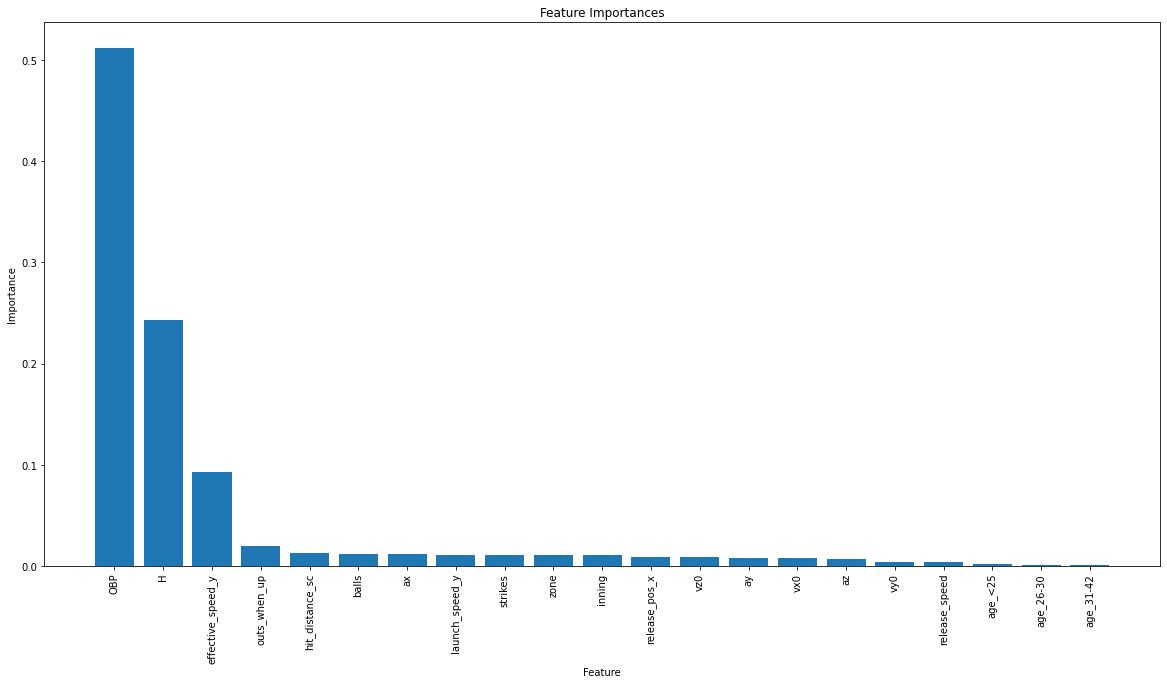

In [144]:
plt.figure(figsize=(20, 10))
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

#### Create test df for Age

In [145]:
df_X3 = df_MLB_merged_final[['age_<25','age_26-30','age_31-42']]

X3_train, X3_test, y_train, y_test = train_test_split(df_X3, df_y, test_size=0.20, random_state=0)

In [146]:
data = {
         'Age':[21,32,45,32,27,28,24,20,26]
}

df_test_X = pd.DataFrame(data)
df_test_X

df_test_X["age_<25"] = df_test_X["Age"]<=25
df_test_X["age_26-30"] = (df_test_X["Age"]>25) & (df_test_X["Age"]<=30)
df_test_X["age_31-42"] = (df_test_X["Age"]>30) & (df_test_X["Age"]<=42)

df_test_X["age_<25"] = df_test_X["age_<25"].astype(int)
df_test_X["age_26-30"] = df_test_X["age_26-30"].astype(int)
df_test_X["age_31-42"] = df_test_X["age_31-42"].astype(int)

df_test_X = df_test_X.drop('Age', axis=1)
df_test_X

age_<25  age_26-30  age_31-42
0        1          0          0
1        0          0          1
2        0          0          0
3        0          0          1
4        0          1          0
5        0          1          0
6        1          0          0
7        1          0          0
8        0          1          0

In [147]:
np.random.seed(0)
pipe = make_pipeline( LinearRegression())
pipe.fit(X3_train, y_train)  

y_pred = pipe.predict(df_test_X)

In [148]:
y_pred

array([0.23285484, 0.2333125 , 0.23224939, 0.2333125 , 0.23058084,
       0.23058084, 0.23285484, 0.23285484, 0.23058084])

In [150]:
model3 = RandomForestRegressor()
model3.fit(X3_train, y_train)

feature_importances = model3.feature_importances_

In [151]:
feature_names2 = []

for i in df_X3.columns:
    feature_names2.append(i)

In [152]:
indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names2[i] for i in indices]

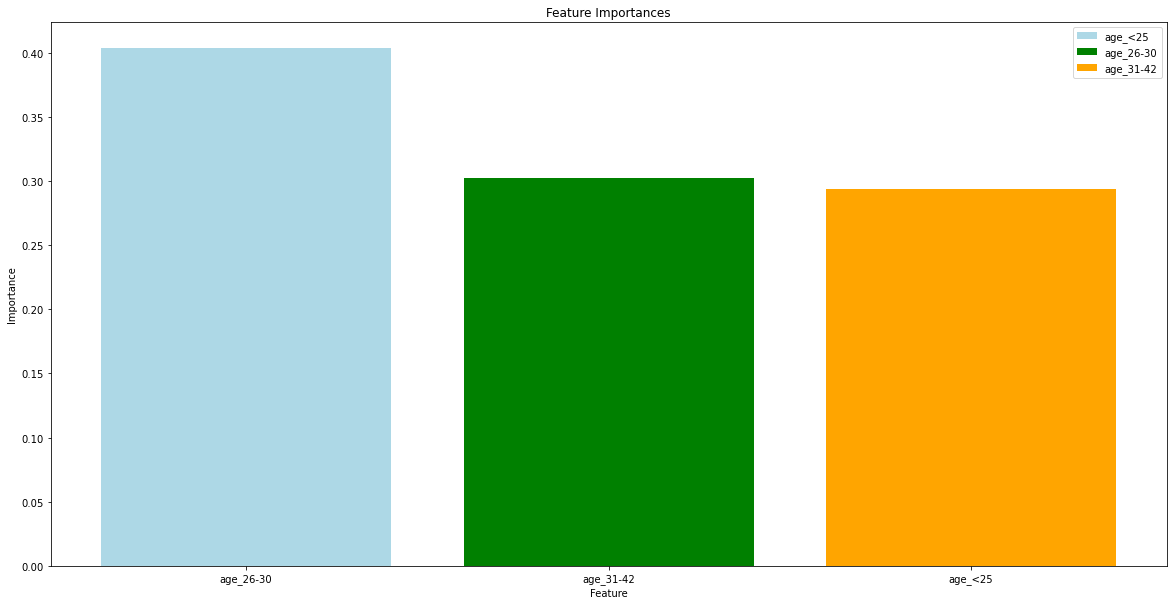

In [153]:
colors = ['lightblue', 'green', 'orange']
plt.figure(figsize=(20, 10))
bars = plt.bar(range(len(feature_importances)), feature_importances[indices], align='center',color=colors)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation='horizontal')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.legend(bars, feature_names2)
plt.show()

In [154]:
from sklearn.inspection import permutation_importance
model4 = RandomForestRegressor()
model4.fit(X3_train, y_train)

result = permutation_importance(model4, X3_train, y_train, n_repeats=10, random_state=0)
feature_importances = result.importances_mean

In [155]:
feature_importances

array([ 4.34959238e-04,  6.05245154e-04, -1.66145906e-05])

In [156]:
df_X4 = df_MLB_merged_final[['vx0','vy0','vz0','ax','ay','az']]

X4_train, X4_test, y_train, y_test = train_test_split(df_X4, df_y, test_size=0.30, random_state=0)

In [157]:
model5 = RandomForestRegressor()
model5.fit(X4_train, y_train)

feature_importances = model5.feature_importances_

In [158]:
feature_names2 = []

for i in df_X4.columns:
    feature_names2.append(i)

In [159]:
indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names2[i] for i in indices]

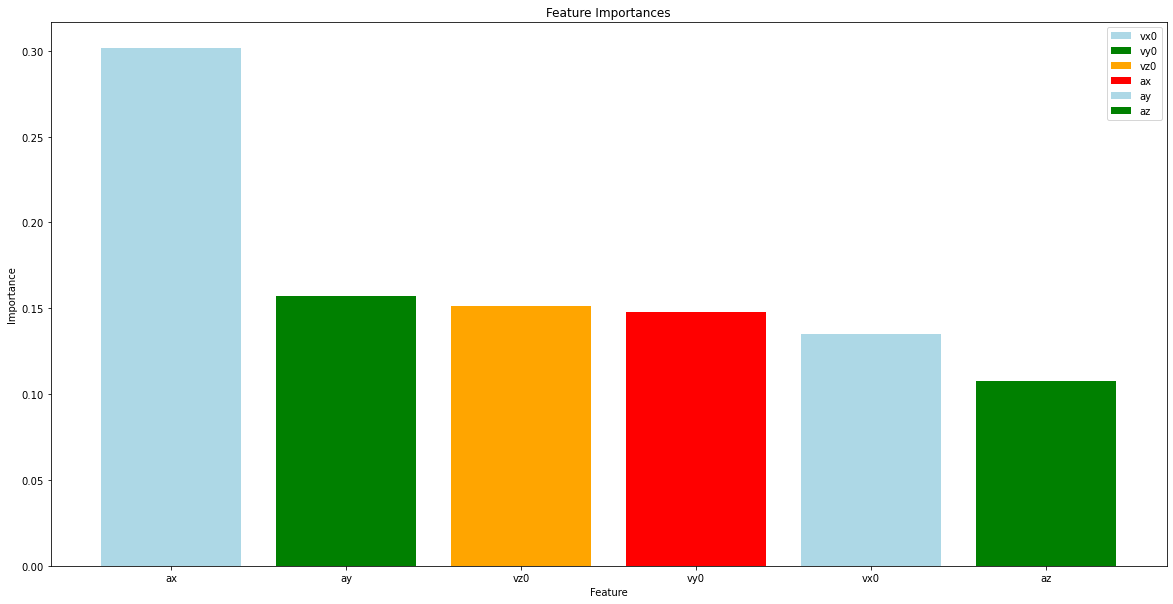

In [160]:
colors = ['lightblue', 'green', 'orange','red']
plt.figure(figsize=(20, 10))
bars = plt.bar(range(len(feature_importances)), feature_importances[indices], align='center',color=colors)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation='horizontal')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.legend(bars, feature_names2)
plt.show()

In [161]:
model1.predict(df_all_features).shape

(464,)

In [162]:
df_MLB_merged_final["xBA"] = model1.predict(df_all_features)

In [162]:
df_MLB_merged_final[df_MLB_merged_final["pitches"]>500].sort_values("xBA", ascending=False)

pitches  player_id                    Name  total_pitches  pitch_percent  \
266     2065     643446            McNeil, Jeff           2065            100   
142     2755     518692        Freeman, Freddie           2755            100   
269      938     608841           Meneses, Joey            938            100   
156     2701     502671       Goldschmidt, Paul           2701            100   
27      2413     650333            Arraez, Luis           2413            100   
212     2906     592450            Judge, Aaron           2906            100   
47      2500     593428        Bogaerts, Xander           2500            100   
17      2195     670541         Alvarez, Yordan           2195            100   
338      732     608701          Refsnyder, Rob            732            100   
73       723     572761         Carpenter, Matt            723            100   
1       2730     547989             Abreu, José           2730            100   
103     1536     602074          Daza, Yonathan           1536            100   
240     2525     663993         Lowe, Nathaniel           2525            100   
336     1578     623912         Ramírez, Harold           1578            100   
15      2308     514888            Altuve, Jose           2308            100   
224     2643     680757            Kwan, Steven           2643            100   
426     2720     607208            Turner, Trea           2720            100   
243     2371     592518          Machado, Manny           2371            100   
154     2044     665926         Giménez, Andrés           2044            100   
109     2232     646240          Devers, Rafael           2232            100   
124     2157     650490             Díaz, Yandy           2157            100   
159     1409     660757         Gonzalez, Oscar           1409            100   
209     1178     650391           Jiménez, Eloy           1178            100   
314     1039     686469     Pasquantino, Vinnie           1039            100   
24      2330     571448          Arenado, Nolan           2330            100   
252     1920     516782         Marte, Starling           1920            100   
95      2419     621043          Correa, Carlos           2419            100   
204     1738     578428          Iglesias, José           1738            100   
168      588     687093         Grissom, Vaughn            588            100   
43      2522     666182            Bichette, Bo           2522            100   
182     1594     547180           Harper, Bryce           1594            100   
306      689     658668        Olivares, Edward            689            100   
427     2017     570482            Urshela, Gio           2017            100   
28      1041     624414       Arroyo, Christian           1041            100   
221     2200     672386         Kirk, Alejandro           2200            100   
381     1189     456781         Solano, Donovan           1189            100   
259     1263     664983          McCarthy, Jake           1263            100   
354     2084     677594        Rodríguez, Julio           2084            100   
423     2105     545361             Trout, Mike           2105            100   
358     2395     642708           Rosario, Amed           2395            100   
115     1966     680977        Donovan, Brendan           1966            100   
448     2297     621493            Ward, Taylor           2297            100   
199     1831     663538           Hoerner, Nico           1831            100   
437     2490     657077           Verdugo, Alex           2490            100   
48      2301     664761              Bohm, Alec           2301            100   
337     2742     608070           Ramírez, José           2742            100   
425     2144     457759          Turner, Justin           2144            100   
92      1546     661388      Contreras, William           1546            100   
140     1216     677551          Fra